# Video Game Sales Analysis (2024)

# About Dataset

This dataset is a continuation of @baynebrannen's 2020 Video Game Sales dataset and @ashaheedq's 2019 Video Games Sales dataset.

Creation of this dataset was inspired by @VinceTheCat02.

Data was collected by running the spider written by @baynebrannen to create his version of the dataset.

I haven't made any major modification to the collection methodology or the dataset structure.
I have removed a few unhelpful columns such as 'vg_score', 'user_score', and 'total_shipped' as these columns mostly contained null values.
All the other columns remain the same.

Game sales dataset from https://www.vgchartz.com

Source : https://www.kaggle.com/datasets/asaniczka/video-game-sales-2024?resource=download


# Importations

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.colors as mcolors
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


# Open and Read Dataset

In [ ]:
df_games = pd.read_csv('/drive/MyDrive/Colab Notebooks/vgchartz-2024.csv')
df_games.head()

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


- img - Boxart of the game

- Title - The games name

- Console - Platform of the games release (i.e. PC, PS5, NS, etc.)

- Genre - Genre of the game

- Publisher - Publisher of the game

- Developer - Developer of the game

- Critic_score - Critic score of the game

- Total_sales - Total worldwide sales

- NA_Sales - Sales in North America (in millions)

- Pal_Sales - Sales in Europe (in millions)

- JP_Sales - Sales in Japan (in millions)

- Other_Sales - Sales in the rest of the world (in millions)

- Release_date : Release date of the game

- Last_update : Last update.

# Data Exploration

In [ ]:
df_games.shape

(64016, 14)

- 64016 rows
- 14 columns

In [ ]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB


Date columns will need to be converted.

In [ ]:
df_games.describe()

,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales
count,6678.000000,18922.000000,12637.000000,6726.000000,12824.000000,15128.000000
mean,7.220440,0.349113,0.264740,0.102281,0.149472,0.043041
std,1.457066,0.807462,0.494787,0.168811,0.392653,0.126643
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.400000,0.030000,0.050000,0.020000,0.010000,0.000000
50%,7.500000,0.120000,0.120000,0.040000,0.040000,0.010000
75%,8.300000,0.340000,0.280000,0.120000,0.140000,0.030000
max,10.000000,20.320000,9.760000,2.130000,9.850000,3.120000


## Data Cleaning

In [ ]:
# Are there any missing values?
print(df_games.isnull().sum())

img                 0
title               0
console             0
genre               0
publisher           0
developer          17
critic_score    57338
total_sales     45094
na_sales        51379
jp_sales        57290
pal_sales       51192
other_sales     48888
release_date     7051
last_update     46137
dtype: int64


We don't delete them.

In [ ]:
# Are there any duplicates?
df_games = df_games.drop_duplicates()
df_games

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64011,/games/boxart/full_2779838AmericaFrontccc.jpg,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,Arc System Works,NaN,NaN,NaN,NaN,NaN,NaN,2016-08-11,2019-01-28
64012,/games/boxart/full_8031506AmericaFrontccc.jpg,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30,2020-05-09
64013,/games/boxart/full_6553045AmericaFrontccc.jpg,"Yoru, Tomosu",NS,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30,2020-05-09
64014,/games/boxart/full_6012940JapanFrontccc.png,Yunohana SpRING! ~Mellow Times~,NS,Visual Novel,Idea Factory,Otomate,NaN,NaN,NaN,NaN,NaN,NaN,2019-02-28,2019-02-24


No duplicates.

In [ ]:
# release_date and last_update to datetime
df_games['release_date'] = pd.to_datetime(df_games['release_date'], format='%Y-%m-%d')
df_games['last_update'] = pd.to_datetime(df_games['last_update'], format='%Y-%m-%d')

In [ ]:
# Extract year and month of release_date
df_games['release_year'] = df_games['release_date'].dt.year.astype('Int64')
df_games['release_month'] = df_games['release_date'].dt.month.astype('Int64')

Release_year -> Year of the game's release

Release_month -> Month of the game's release

In [ ]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   img            64016 non-null  object        
 1   title          64016 non-null  object        
 2   console        64016 non-null  object        
 3   genre          64016 non-null  object        
 4   publisher      64016 non-null  object        
 5   developer      63999 non-null  object        
 6   critic_score   6678 non-null   float64       
 7   total_sales    18922 non-null  float64       
 8   na_sales       12637 non-null  float64       
 9   jp_sales       6726 non-null   float64       
 10  pal_sales      12824 non-null  float64       
 11  other_sales    15128 non-null  float64       
 12  release_date   56965 non-null  datetime64[ns]
 13  last_update    17879 non-null  datetime64[ns]
 14  release_year   56965 non-null  Int64         
 15  release_month  5696

In [ ]:
df_games = df_games.drop(columns=['img'])
df_games.head(2)

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update,release_year,release_month
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaT,2013,9
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03,2014,11


In [ ]:
oldest_date = df_games['release_date'].min()
most_recent_date = df_games['release_date'].max()

print(f"Oldest game : {oldest_date}")
print(f"Most recent game : {most_recent_date}")

Oldest game : 1971-12-03 00:00:00
Most recent game : 2024-12-31 00:00:00


Error with the most recent date (December 31, 2024) : it's probably a default date.

*(Note: This analysis was carried out in July 2024.)*

### Univariate Analysis

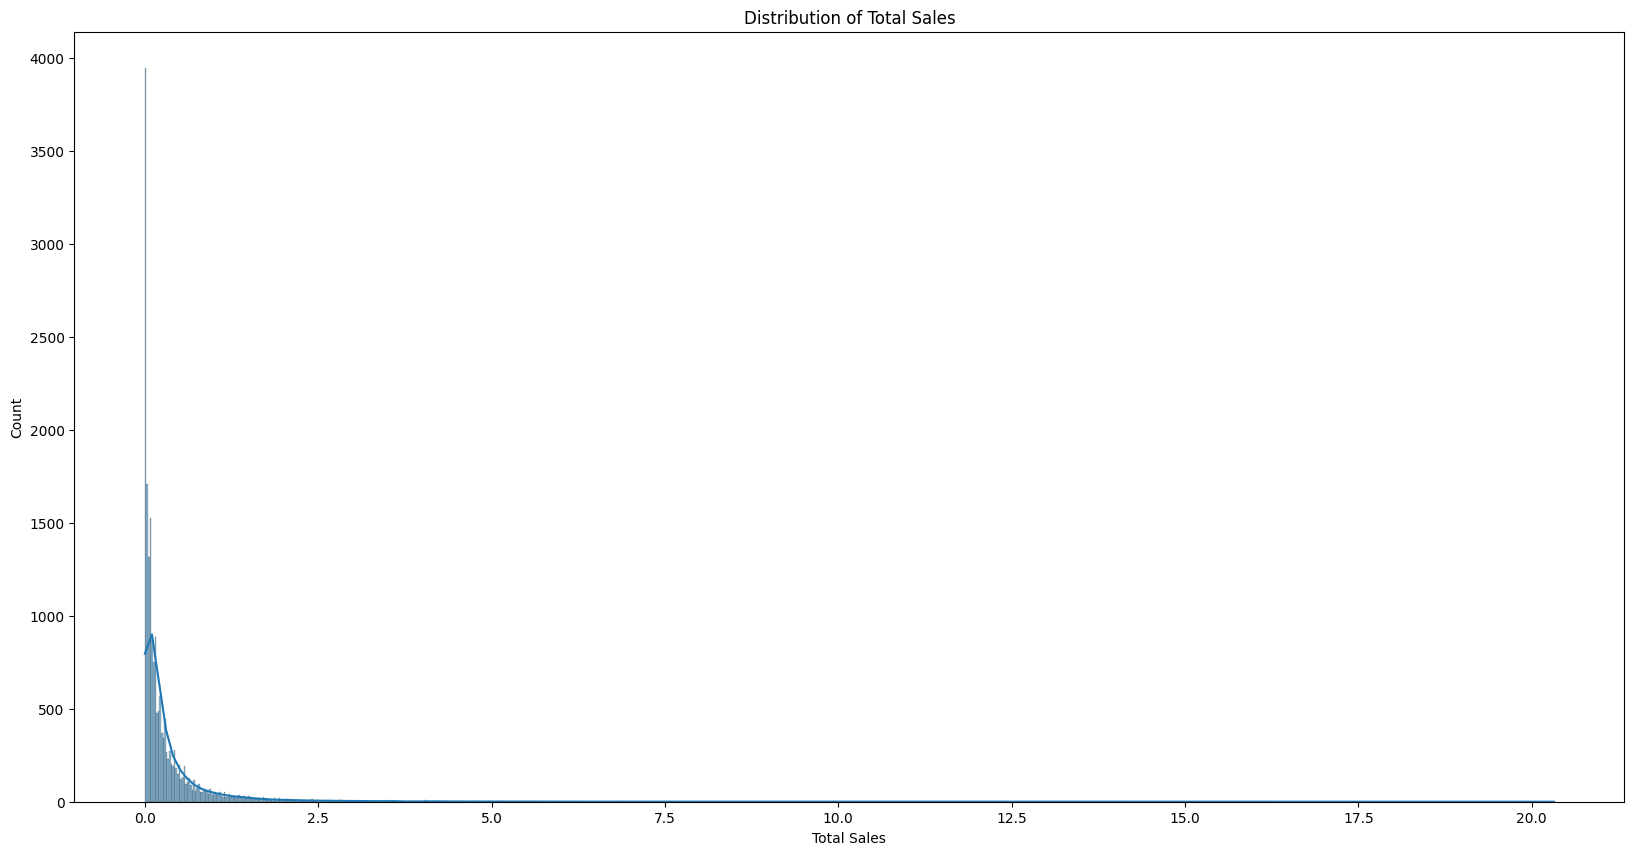

In [ ]:
# Univariate Analysis Total_Sales
plt.figure(figsize=(20, 10))
sns.histplot(df_games['total_sales'], kde=True)
plt.title('Distribution of Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Count')
plt.show()

### Multivariate Analysis

<Figure size 3000x1500 with 0 Axes>

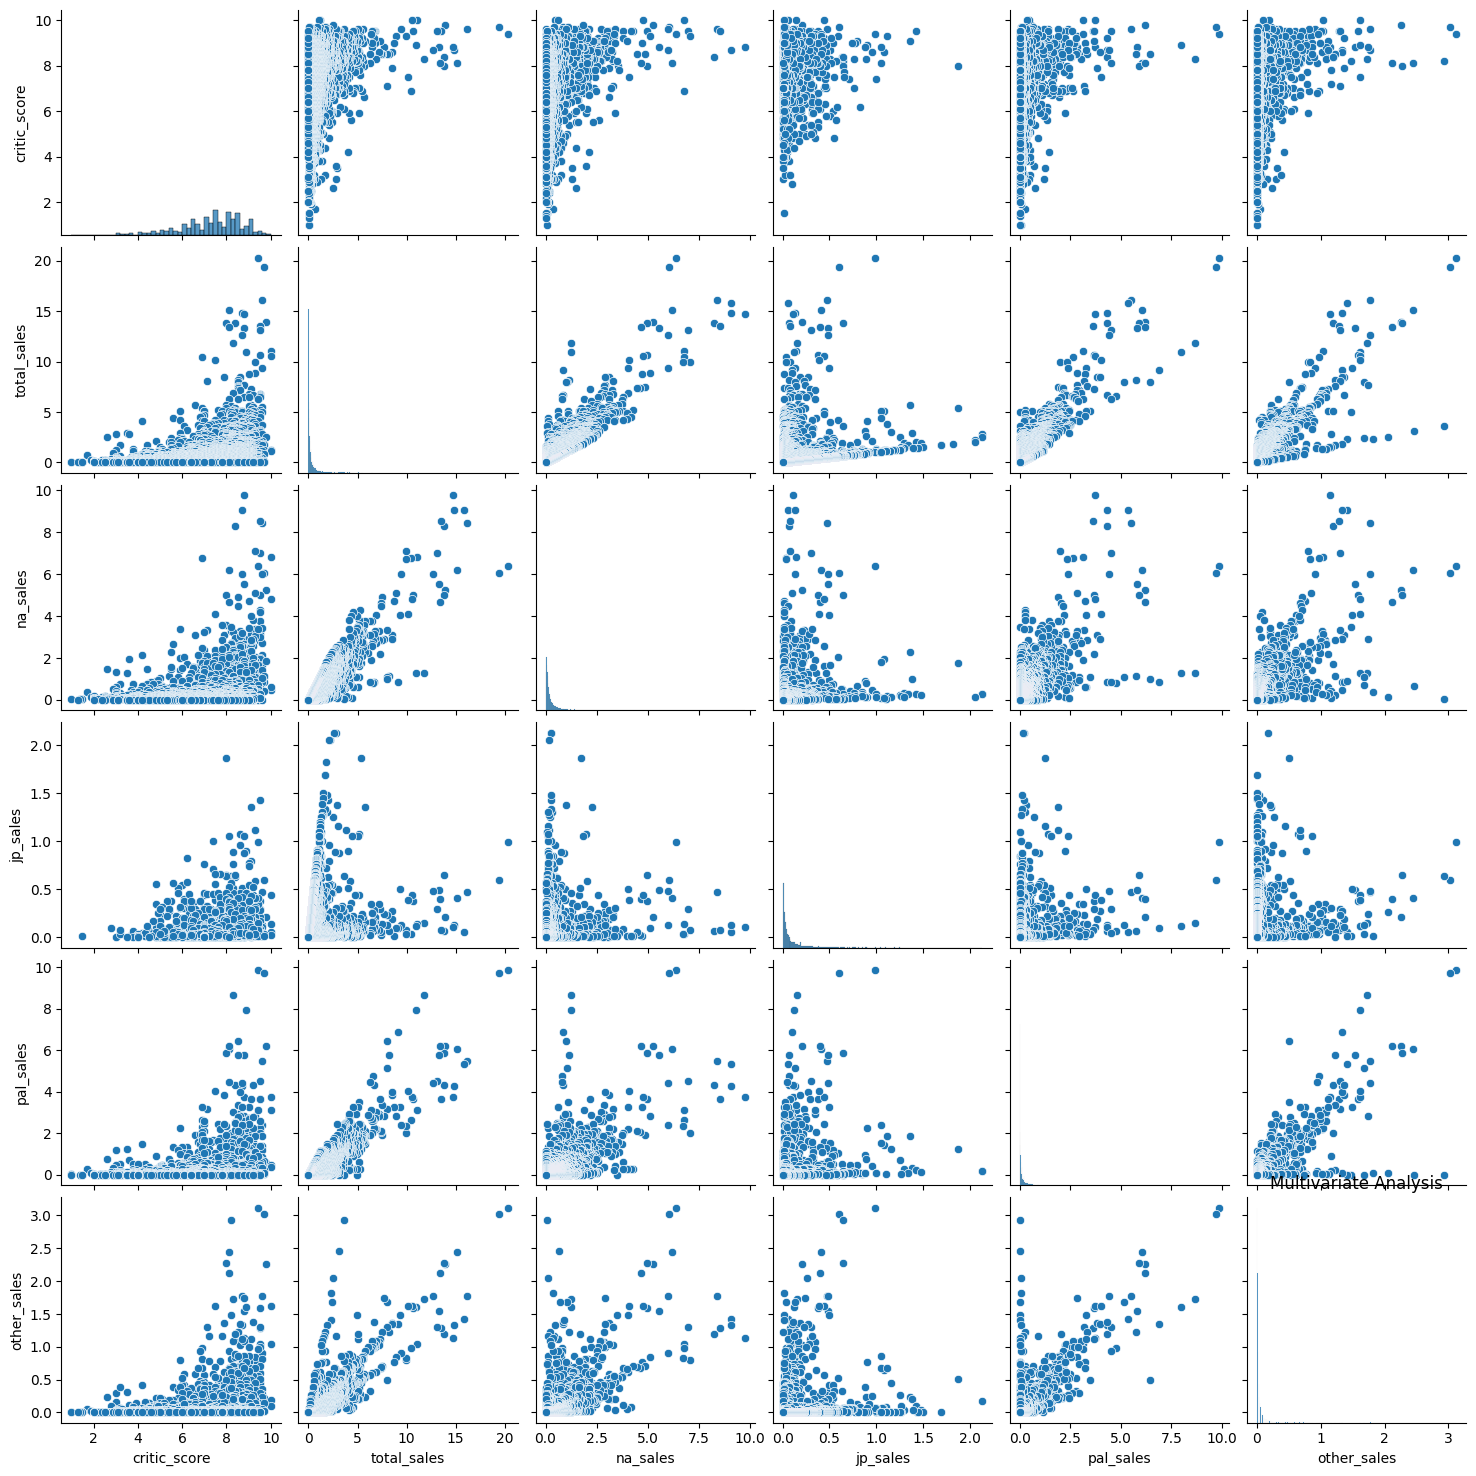

In [ ]:
plt.figure(figsize=(30, 15))
sns.pairplot(df_games[['critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']])
plt.title('Multivariate Analysis')
plt.xticks(rotation=45)
plt.show()

## Selling Games

### Top 20 Selling Games

In [ ]:
top_selling_games = df_games.groupby('title')['total_sales'].sum().sort_values(ascending=False).head(20)
top_selling_games

title
Grand Theft Auto V                  64.29
Call of Duty: Black Ops             30.99
Call of Duty: Modern Warfare 3      30.71
Call of Duty: Black Ops II          29.59
Call of Duty: Ghosts                28.80
Call of Duty: Black Ops 3           26.72
Call of Duty: Modern Warfare 2      25.02
Minecraft                           24.01
Grand Theft Auto IV                 22.53
Call of Duty: Advanced Warfare      21.78
The Elder Scrolls V: Skyrim         20.51
Call of Duty: WWII                  19.82
Red Dead Redemption 2               19.71
Call of Duty 4: Modern Warfare      18.33
FIFA 15                             18.03
Battlefield 3                       17.32
FIFA 14                             17.31
FIFA 17                             17.02
FIFA 18                             16.92
Guitar Hero III: Legends of Rock    16.38
Name: total_sales, dtype: float64

In [ ]:
# Convert to a DF
top_selling_games_df = top_selling_games.reset_index()
top_selling_games_df.columns = ['Title', 'Total Sales']
top_selling_games_df

,Title,Total Sales
0,Grand Theft Auto V,64.29
1,Call of Duty: Black Ops,30.99
2,Call of Duty: Modern Warfare 3,30.71
3,Call of Duty: Black Ops II,29.59
4,Call of Duty: Ghosts,28.80
5,Call of Duty: Black Ops 3,26.72
6,Call of Duty: Modern Warfare 2,25.02
7,Minecraft,24.01
8,Grand Theft Auto IV,22.53
9,Call of Duty: Advanced Warfare,21.78


<ipython-input-18-c83b801beeb6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sales_plot = sns.barplot(


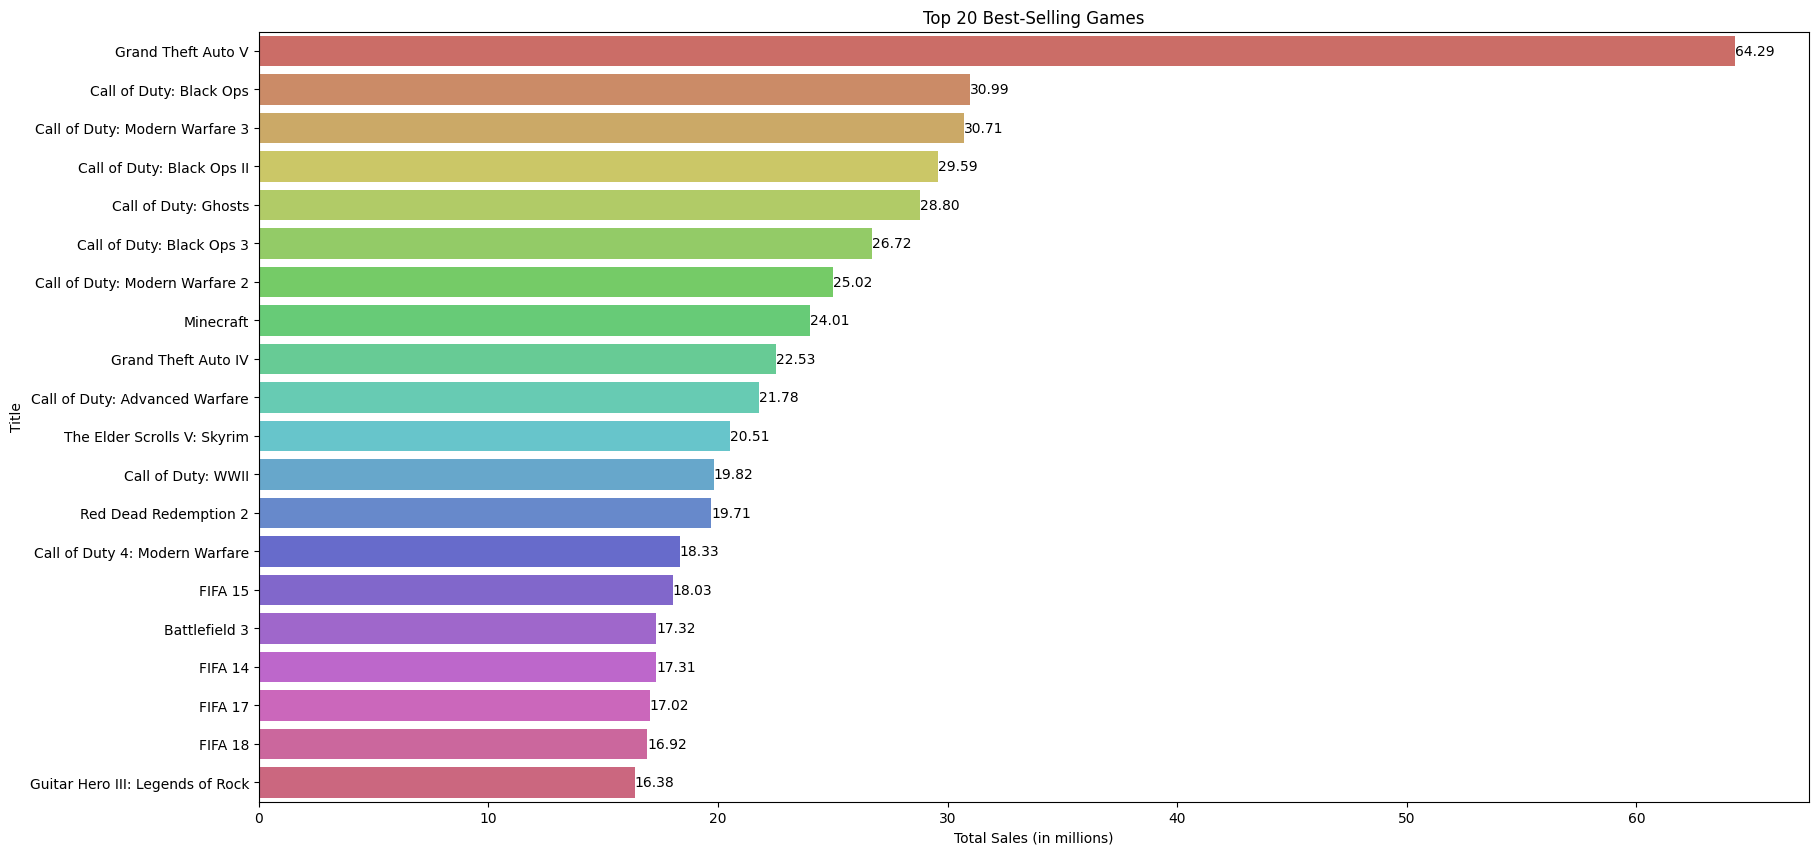

In [ ]:
# Chart

plt.figure(figsize=(20, 10))
sales_plot = sns.barplot(
    x='Total Sales',
    y='Title',
    data=top_selling_games_df,
    palette='hls'
)

for index, row in top_selling_games_df.iterrows():
    sales_plot.text(
        row['Total Sales'],
        index,
        f"{row['Total Sales']:.2f}",
        color='black',
        ha="left",
        va="center"
    )

# Titles and labels
plt.title('Top 20 Best-Selling Games')
plt.xlabel('Total Sales (in millions)')
plt.ylabel('Title')

plt.show()

## By Genre

### Genres with the most releases

In [ ]:
# Group by consoles and count by title
genre_count = df_games.groupby('genre')['title'].count().sort_values(ascending=False).head(20)

In [ ]:
# Convert to a DF
genre_count_df = genre_count.reset_index()
genre_count_df.columns = ['Genre', 'Nb of games releases']
genre_count_df

,Genre,Nb of games releases
0,Misc,9304
1,Action,8557
2,Adventure,6260
3,Role-Playing,5721
4,Sports,5586
5,Shooter,5410
6,Platform,4001
7,Strategy,3685
8,Puzzle,3521
9,Racing,3425


<ipython-input-21-ee2cefb063cc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_plot = sns.barplot(


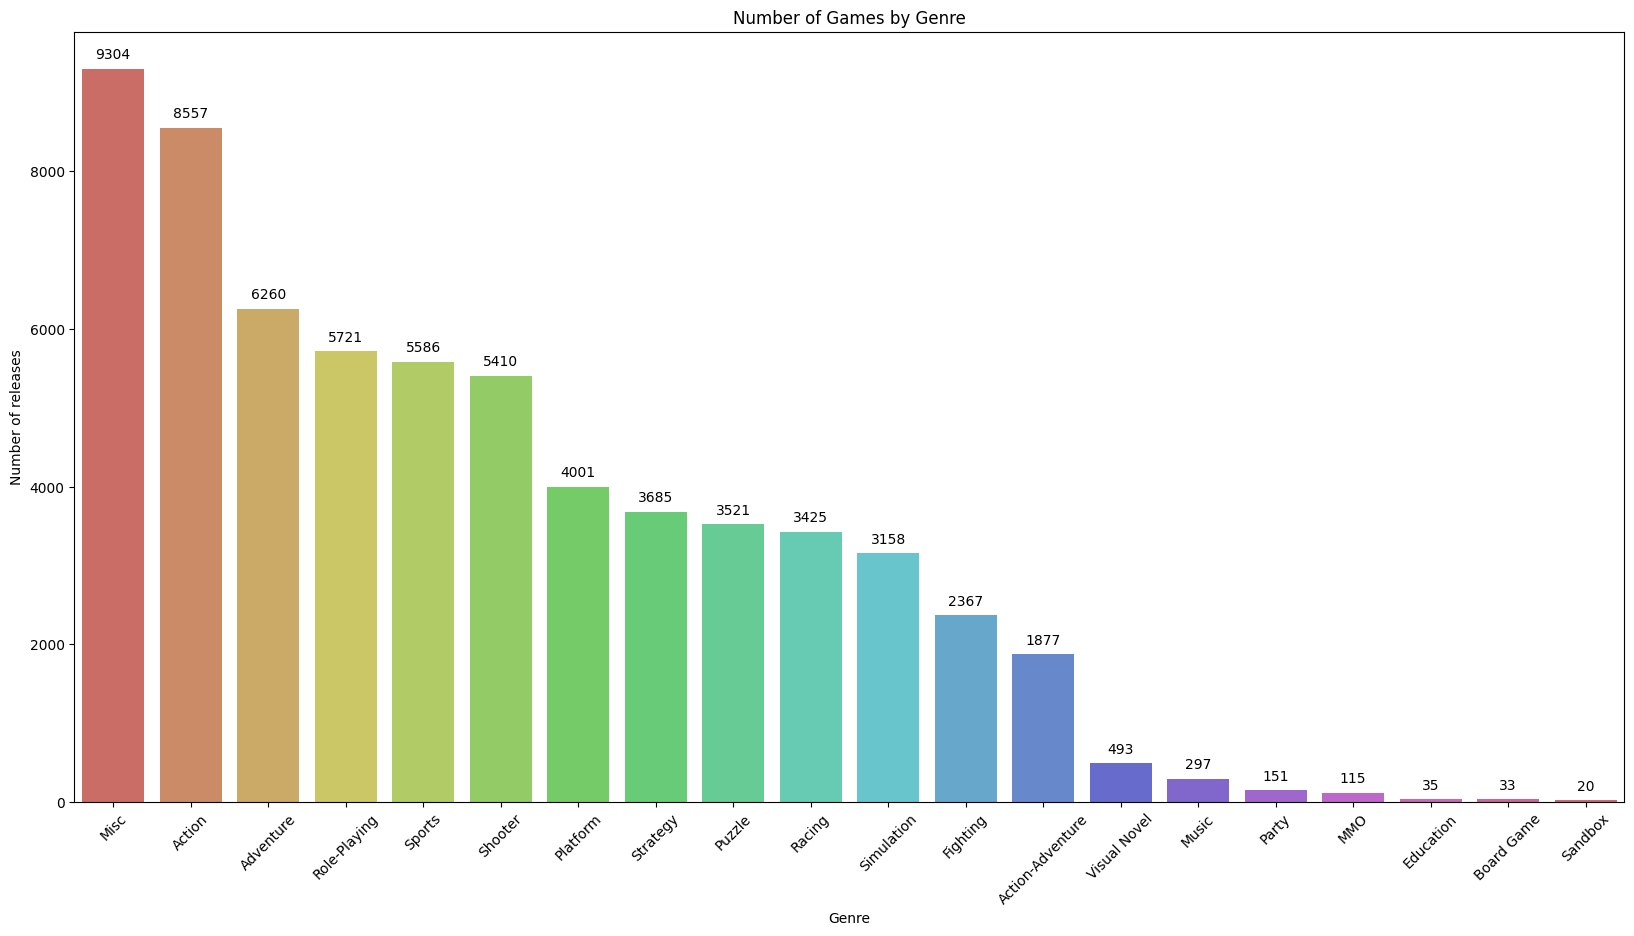

In [ ]:
# Chart
plt.figure(figsize=(20, 10))
count_plot = sns.barplot(
    x='Genre',
    y='Nb of games releases',
    data=genre_count_df,
    palette='hls'
)

for p in count_plot.patches:
    count_plot.annotate(
        f"{int(p.get_height())}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 10),
        textcoords='offset points'
    )

plt.title('Number of Games by Genre')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.ylabel('Number of releases')

plt.show()

### Total Sales by Genre

In [ ]:
# Group by genre and Total Sales
genre_sales = df_games.groupby('genre')['total_sales'].sum().reset_index()

In [ ]:
# Sort values by Total Sales
genre_sales = genre_sales.sort_values(by='total_sales', ascending=False)

<ipython-input-24-98fefeb40bf2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sales_plot = sns.barplot(


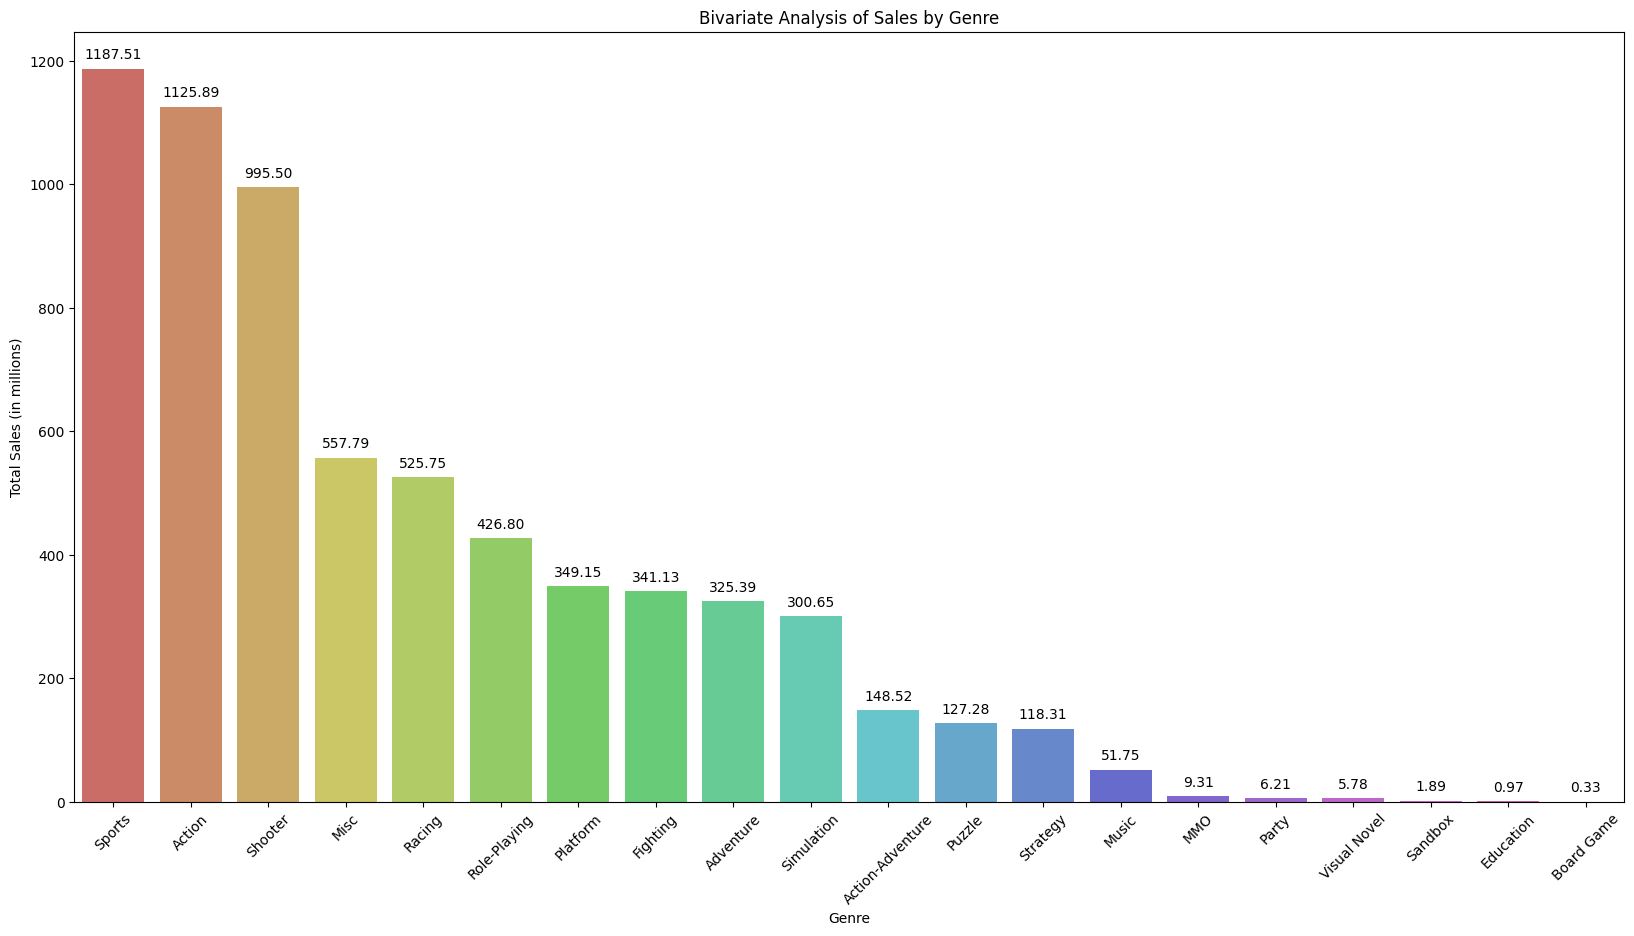

In [ ]:
# Chart
plt.figure(figsize=(20, 10))
sales_plot = sns.barplot(
    x='genre',
    y='total_sales',
    data=genre_sales,
    palette='hls'
)

for p in sales_plot.patches:
    sales_plot.annotate(
        f"{p.get_height():.2f}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 10),
        textcoords='offset points'
    )

plt.title('Bivariate Analysis of Sales by Genre')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.ylabel('Total Sales (in millions)')

plt.show()

### Critic score by Genre

In [ ]:
# Group by genre and average critic score
genre_score = df_games.groupby('genre')['critic_score'].mean().reset_index()

<ipython-input-26-cd8cdddb9b0c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  score_plot = sns.barplot(


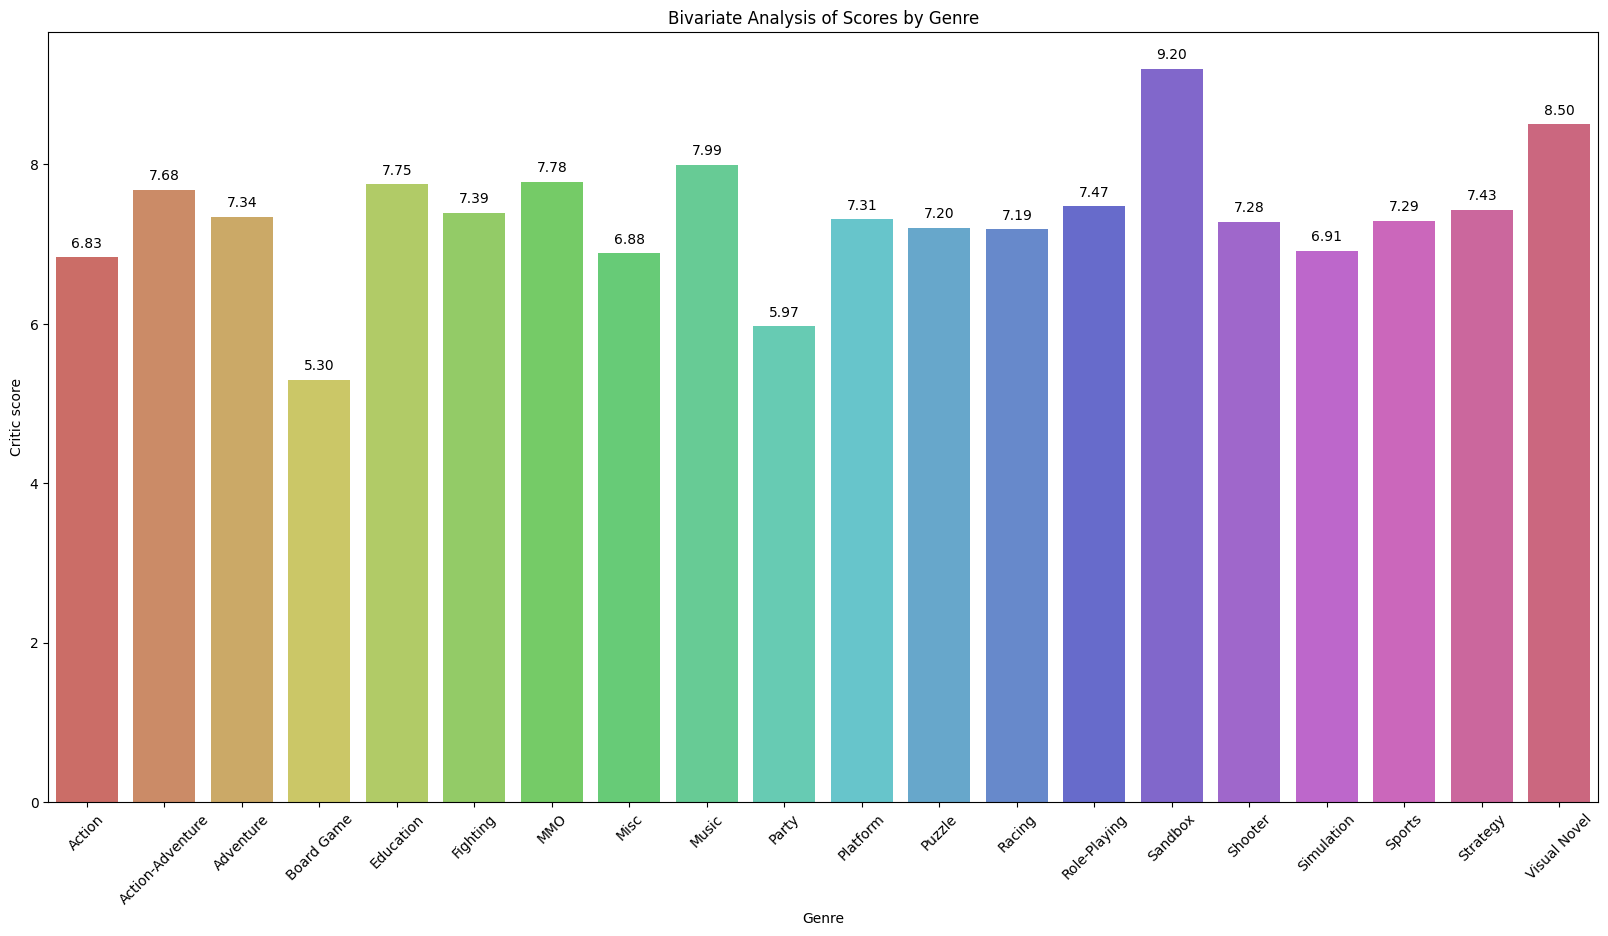

In [ ]:
# Chart
plt.figure(figsize=(20, 10))
score_plot = sns.barplot(
    x='genre',
    y='critic_score',
    data=genre_score,
    palette='hls'
)

for p in score_plot.patches:
    score_plot.annotate(
        f"{p.get_height():.2f}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 10),
        textcoords='offset points'
    )

plt.title('Bivariate Analysis of Scores by Genre')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.ylabel('Critic score')

plt.show()

## By Publisher

### Publisher with the most releases

In [ ]:
# Group by publisher and count by title
publisher_count = df_games.groupby('publisher')['title'].count().sort_values(ascending=False).head(20)

In [ ]:
# Convert to a DF
publisher_count_df = publisher_count.reset_index()
publisher_count_df.columns = ['Publisher', 'Nb of games releases']
publisher_count_df

,Publisher,Nb of games releases
0,Unknown,8842
1,Sega,2207
2,Ubisoft,1663
3,Electronic Arts,1619
4,Activision,1582
5,Konami,1544
6,Nintendo,1476
7,Sony Computer Entertainment,1372
8,Microsoft,1272
9,THQ,1111


<ipython-input-29-d59d6454ec88>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_plot = sns.barplot(


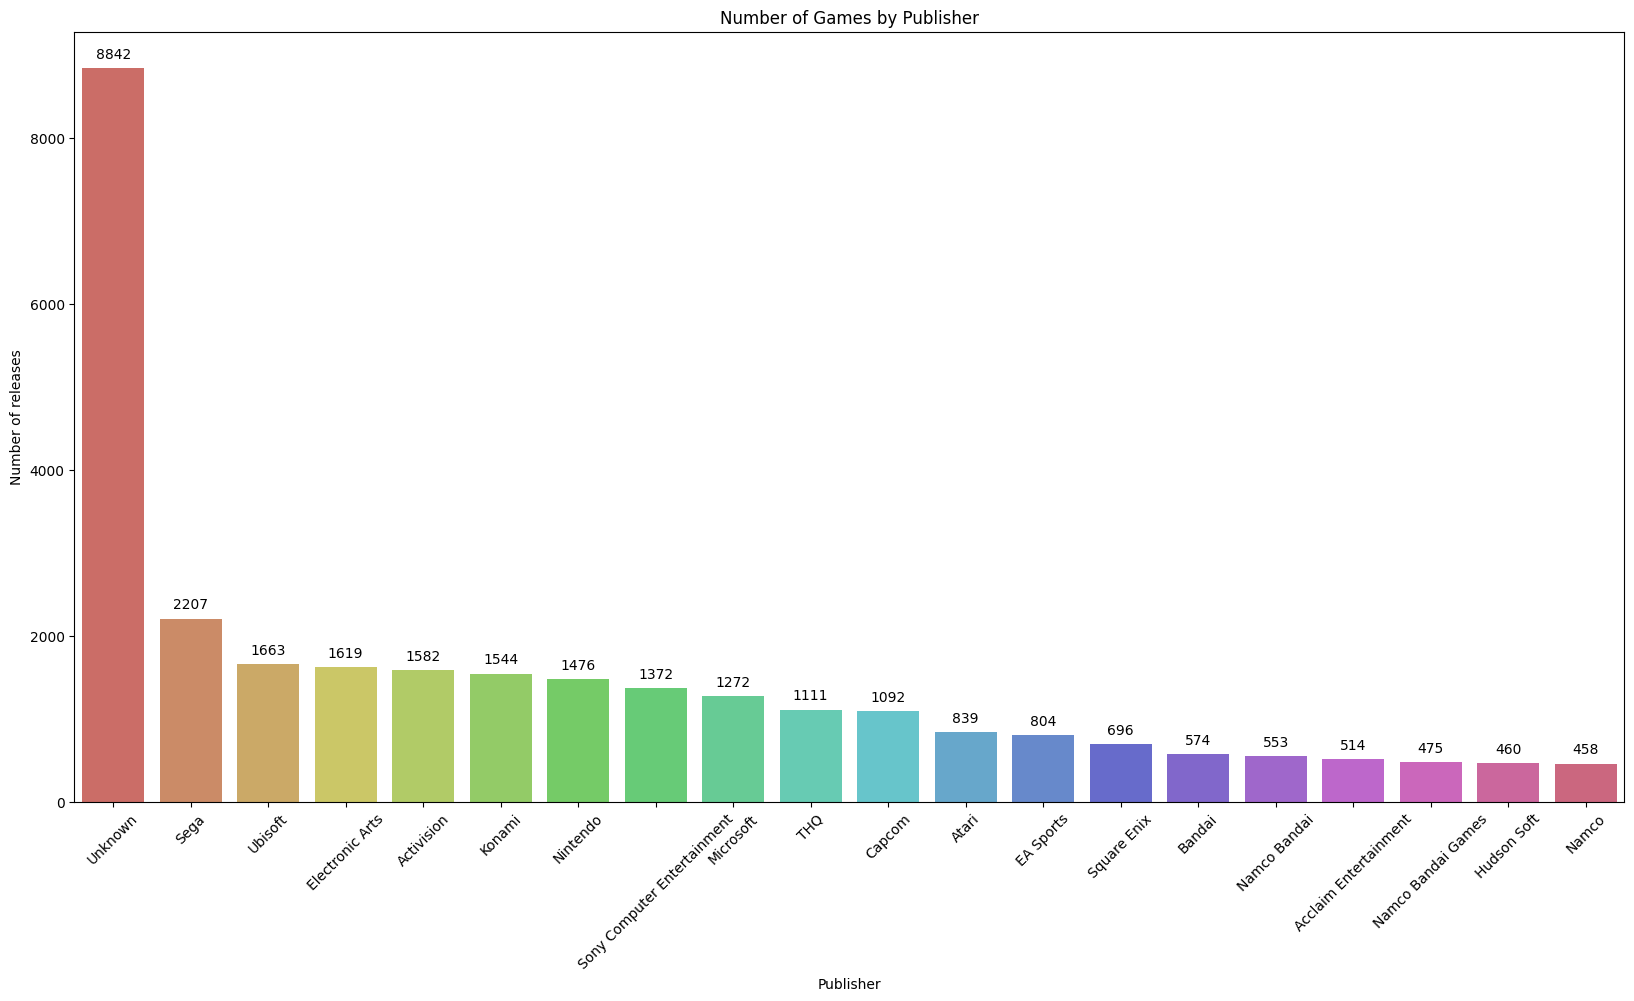

In [ ]:
# Chart
plt.figure(figsize=(20, 10))
count_plot = sns.barplot(
    x='Publisher',
    y='Nb of games releases',
    data=publisher_count_df,
    palette='hls'
)

for p in count_plot.patches:
    count_plot.annotate(
        f"{int(p.get_height())}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 10),
        textcoords='offset points'
    )

plt.title('Number of Games by Publisher')
plt.xlabel('Publisher')
plt.xticks(rotation=45)
plt.ylabel('Number of releases')

plt.show()

### Total Sales by Publisher

In [ ]:
# Group by genre and Total Sales
publisher_sales = df_games.groupby('publisher')['total_sales'].sum().sort_values(ascending=False).head(20)

In [ ]:
# Convert to a DF
publisher_sales_df = publisher_sales.reset_index()
publisher_sales_df.columns = ['Publisher', 'Total Sales']
publisher_sales_df

,Publisher,Total Sales
0,Activision,722.77
1,Electronic Arts,644.13
2,EA Sports,485.66
3,Ubisoft,462.57
4,THQ,320.89
5,Sony Computer Entertainment,311.08
6,Rockstar Games,239.67
7,Konami,210.70
8,Sega,206.38
9,Nintendo,140.80


<ipython-input-32-cd38c6890bc3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sales_plot = sns.barplot(


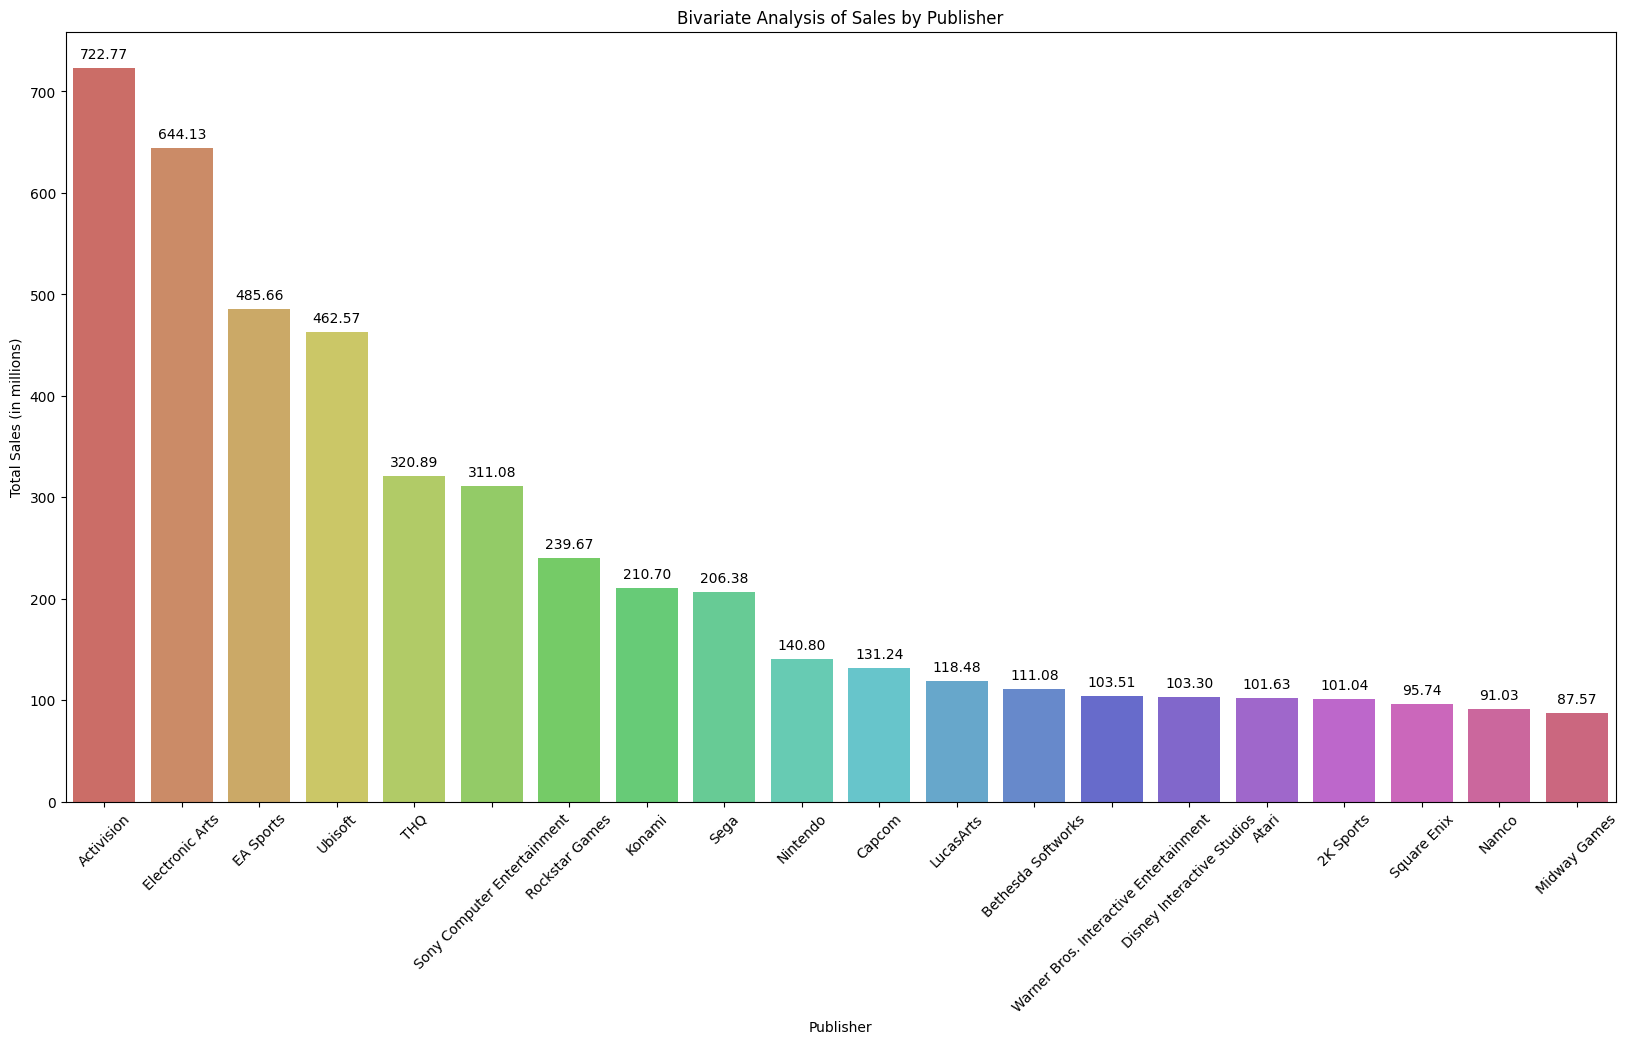

In [ ]:
# Chart
plt.figure(figsize=(20, 10))
sales_plot = sns.barplot(
    x='Publisher',
    y='Total Sales',
    data=publisher_sales_df,
    palette='hls'
)

for p in sales_plot.patches:
    sales_plot.annotate(
        f"{p.get_height():.2f}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 10),
        textcoords='offset points'
    )

plt.title('Bivariate Analysis of Sales by Publisher')
plt.xlabel('Publisher')
plt.xticks(rotation=45)
plt.ylabel('Total Sales (in millions)')

plt.show()

### Critic score by Publisher

In [ ]:
# Group by publisher and average critic score
publisher_score = df_games.groupby('publisher')['critic_score'].mean().sort_values(ascending=False).head(20)

In [ ]:
# Convert to a DF
publisher_score_df = publisher_score.reset_index()
publisher_score_df.columns = ['Publisher', 'Critic score']
publisher_score_df

,Publisher,Critic score
0,Toby Fox,9.700000
1,Bifrost Entertainment,9.500000
2,Bimboosoft,9.400000
3,2D Boy,9.200000
4,Psyonix Studios,9.200000
5,Matt Makes Games Inc.,9.150000
6,Stardock,9.150000
7,The Fullbright Company,9.100000
8,Chucklefish,9.100000
9,Q Entertainment,9.100000


<ipython-input-35-be97cd6798d9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  score_plot = sns.barplot(


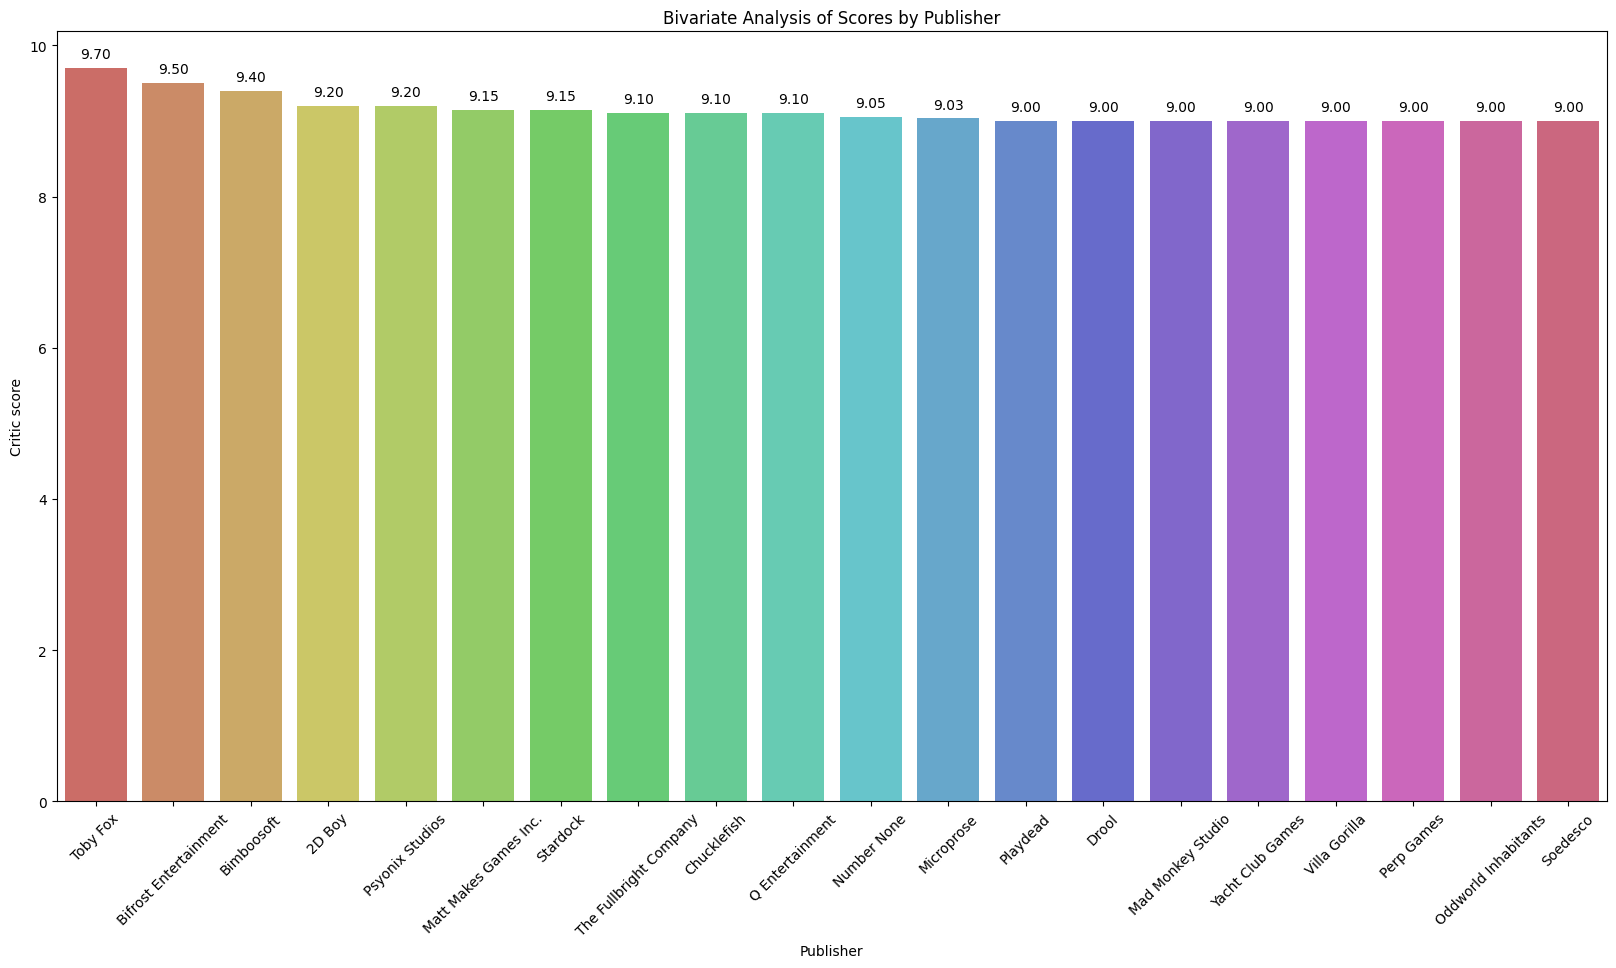

In [ ]:
# Chart
plt.figure(figsize=(20, 10))
score_plot = sns.barplot(
    x='Publisher',
    y='Critic score',
    data=publisher_score_df,
    palette='hls'
)

for p in score_plot.patches:
    score_plot.annotate(
        f"{p.get_height():.2f}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 10),
        textcoords='offset points'
    )

plt.title('Bivariate Analysis of Scores by Publisher')
plt.xlabel('Publisher')
plt.xticks(rotation=45)
plt.ylabel('Critic score')

plt.show()

## By Regions

### Sales Distribution by Regions

In [ ]:
region_data = df_games[['genre', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']]

In [ ]:
region_data['total_sales'] = region_data[['na_sales', 'jp_sales', 'pal_sales']].sum(axis=1)

<ipython-input-37-c909ee5268f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_data['total_sales'] = region_data[['na_sales', 'jp_sales', 'pal_sales']].sum(axis=1)


In [ ]:
genre_region_sales_long = pd.melt(region_data, id_vars='genre', value_vars=['na_sales', 'jp_sales', 'pal_sales', 'other_sales'],
                                  var_name='Region', value_name='Sales')

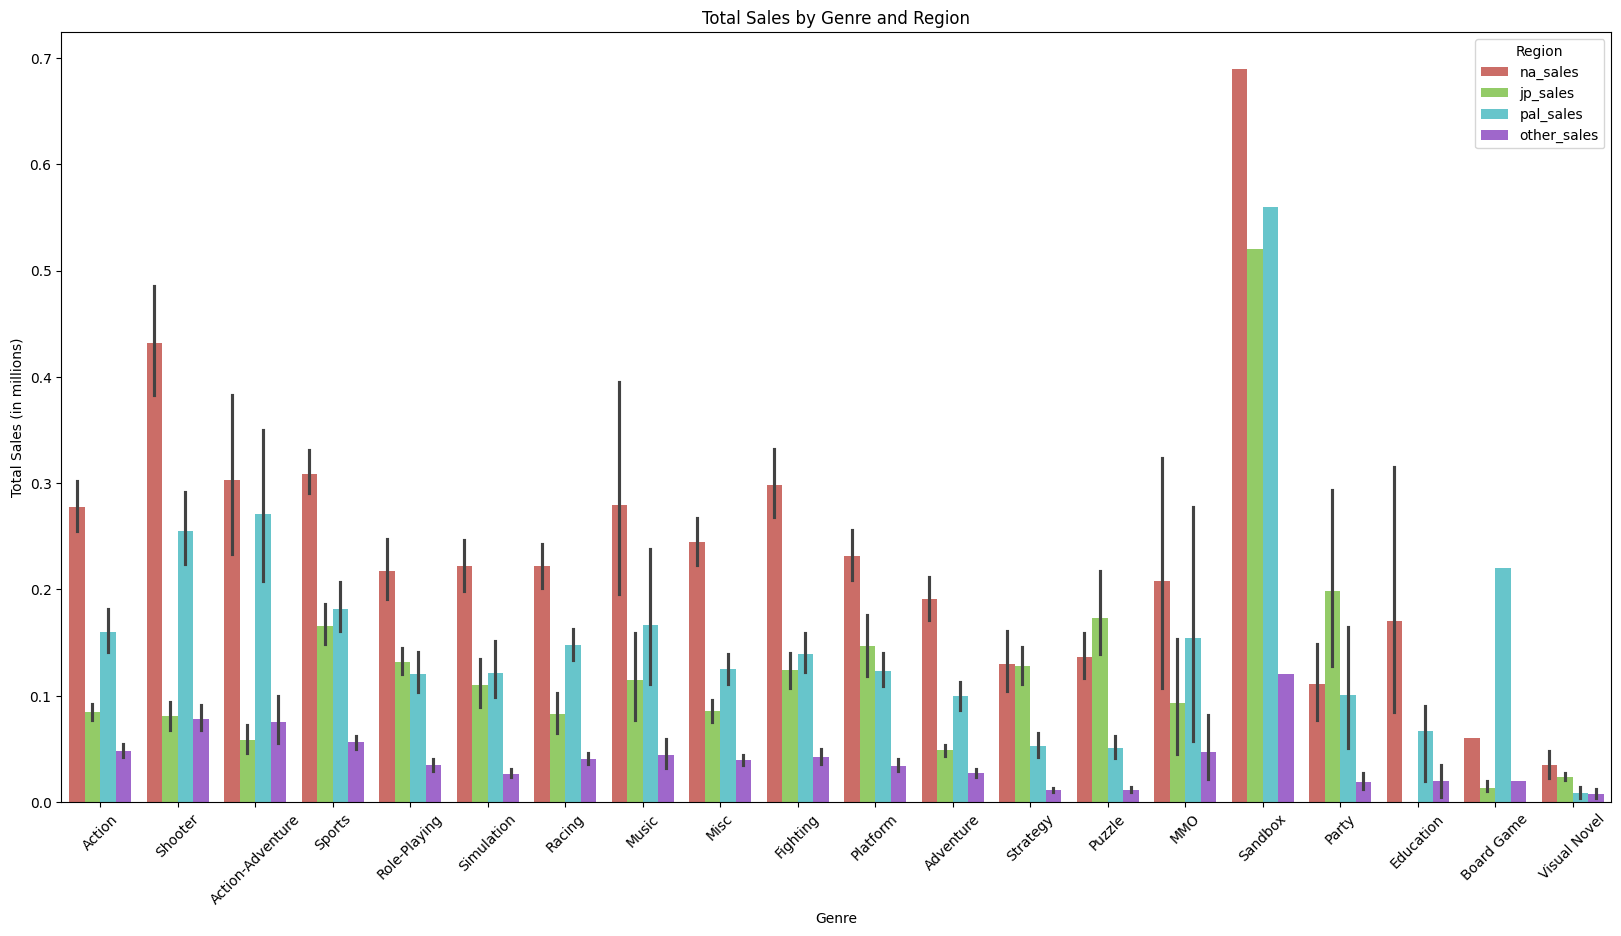

In [ ]:
# Chart
plt.figure(figsize=(20, 10))
stacked_barplot = sns.barplot(data=genre_region_sales_long, x='genre', y='Sales', hue='Region', palette='hls')

plt.title('Total Sales by Genre and Region')
plt.xlabel('Genre')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.show()

### Genre Preferences Across Regions

In [ ]:
# Group by region and genre
region_sales = df_games.groupby('genre')[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']].sum()

In [ ]:
# Normalize sales data to obtain %
region_sales_norm = region_sales.div(region_sales.sum(axis=1), axis=0) * 100

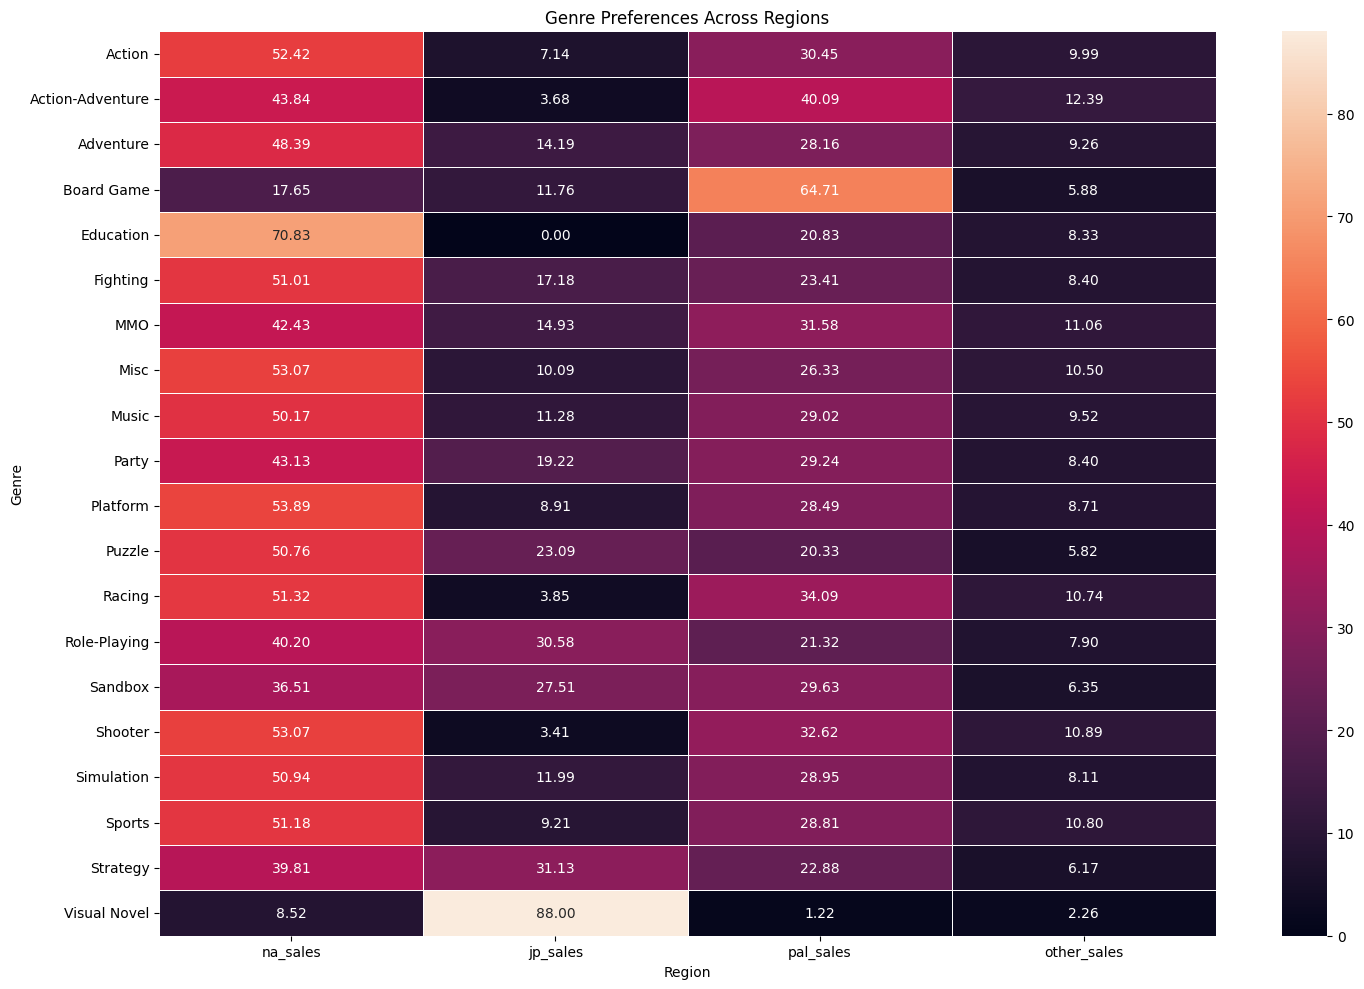

In [ ]:
# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(region_sales_norm, cmap='rocket', annot=True, fmt='.2f', linewidths=.5)
plt.title('Genre Preferences Across Regions')
plt.xlabel('Region')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

## By Console

### Consoles with the most releases

In [ ]:
# Group by consoles and count by title
console_count = df_games.groupby('console')['title'].count().sort_values(ascending=False).head(20)

In [ ]:
# Convert to a DF
console_count_df = console_count.reset_index()
console_count_df.columns = ['Console', 'Nb of games releases']
console_count_df

,Console,Nb of games releases
0,PC,12617
1,PS2,3565
2,DS,3288
3,PS4,2878
4,PS,2707
5,NS,2337
6,XBL,2120
7,PSN,2004
8,XOne,1963
9,PS3,1905


<ipython-input-45-193cf72d00fd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_plot = sns.barplot(


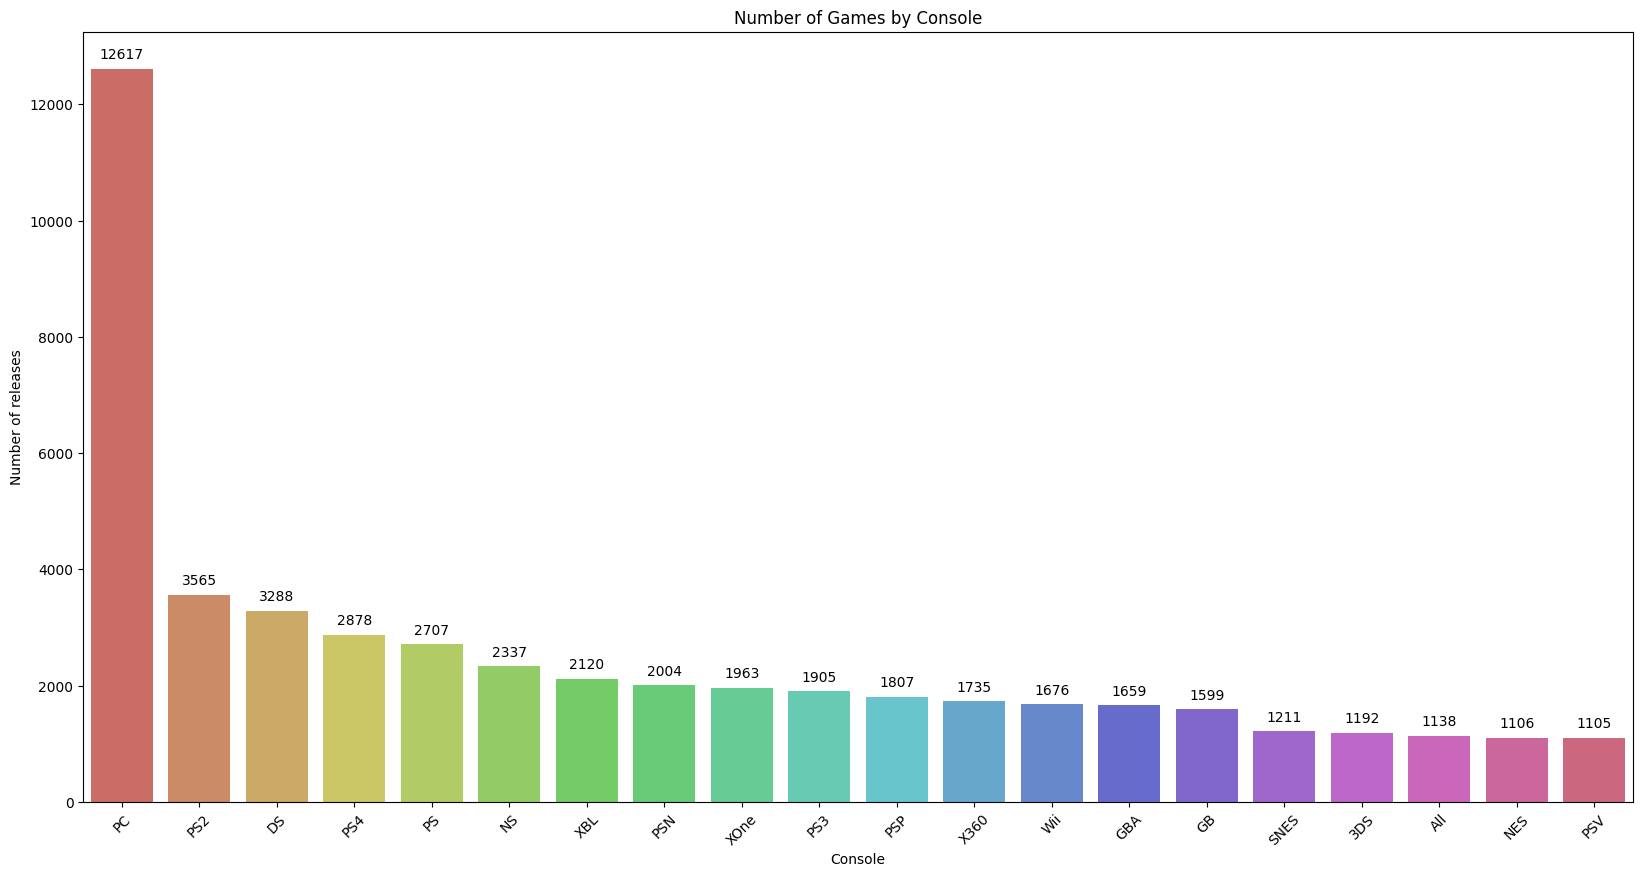

In [ ]:
# Chart
plt.figure(figsize=(20, 10))
count_plot = sns.barplot(
    x='Console',
    y='Nb of games releases',
    data=console_count_df,
    palette='hls'
)

for p in count_plot.patches:
    count_plot.annotate(
        f"{int(p.get_height())}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 10),
        textcoords='offset points'
    )

plt.title('Number of Games by Console')
plt.xlabel('Console')
plt.xticks(rotation=45)
plt.ylabel('Number of releases')

plt.show()

### Total Sales by Consoles

In [ ]:
# Group by Console and Total Sales
console_sales = df_games.groupby('console')['total_sales'].sum().sort_values(ascending=False).head(20)

In [ ]:
# Convert to a DF
console_sales_df = console_sales.reset_index()
console_sales_df.columns = ['Console', 'Total Sales']
console_sales_df

,Console,Total Sales
0,PS2,1027.76
1,X360,859.79
2,PS3,839.70
3,PS,546.25
4,PS4,539.92
5,Wii,459.44
6,DS,458.17
7,XOne,268.96
8,PSP,245.29
9,XB,232.05


<ipython-input-48-2f22c44d9f7a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sales_plot = sns.barplot(


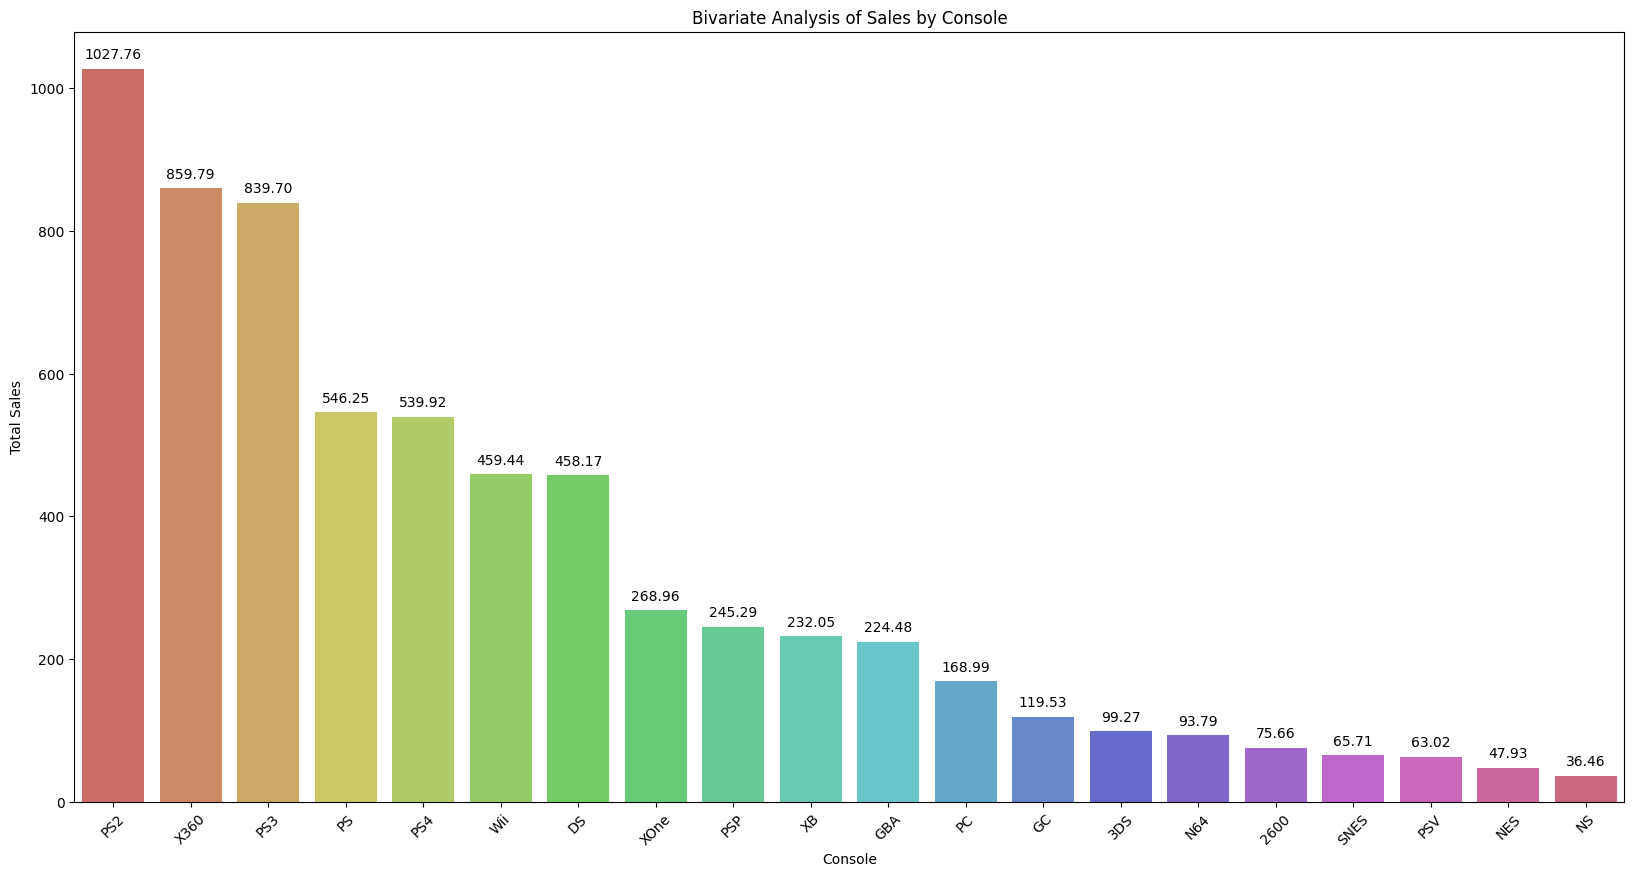

In [ ]:
# Chart
plt.figure(figsize=(20, 10))
sales_plot = sns.barplot(
    x='Console',
    y='Total Sales',
    data=console_sales_df,
    palette='hls'
)

for p in sales_plot.patches:
    sales_plot.annotate(
        f"{p.get_height():.2f}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 10),
        textcoords='offset points'
    )

plt.title('Bivariate Analysis of Sales by Console')
plt.xlabel('Console')
plt.xticks(rotation=45)
plt.ylabel('Total Sales')
plt.show()

### Critic scores by Console

In [ ]:
# Group by console and average critic score
console_score = df_games.groupby('console')['critic_score'].mean().sort_values(ascending=False).head(20)

In [ ]:
# Convert to a DF
console_score_df = console_score.reset_index()
console_score_df.columns = ['Console', 'Critic score']
console_score_df

,Console,Critic score
0,GBC,9.100000
1,All,8.760000
2,OSX,8.750000
3,Linux,8.700000
4,NES,8.680000
5,GEN,8.666667
6,SNES,8.433333
7,SAT,8.100000
8,XOne,7.901389
9,VC,7.889855


<ipython-input-51-1488a8b35ae3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  score_plot = sns.barplot(


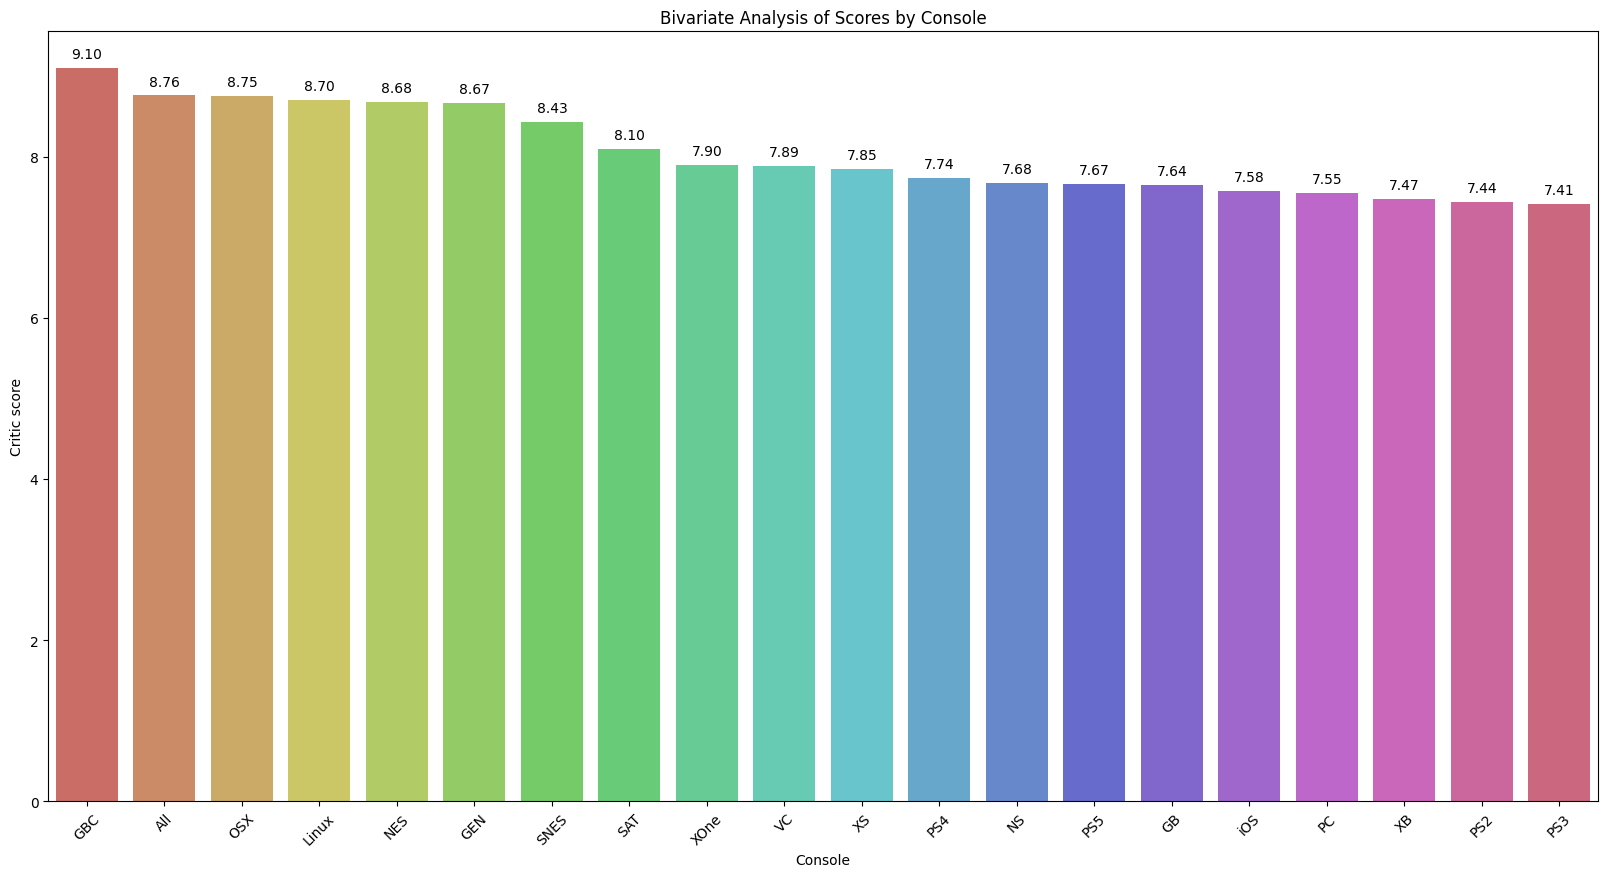

In [ ]:
# Chart
plt.figure(figsize=(20, 10))
score_plot = sns.barplot(
    x='Console',
    y='Critic score',
    data=console_score_df,
    palette='hls'
)

for p in score_plot.patches:
    score_plot.annotate(
        f"{p.get_height():.2f}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 10),
        textcoords='offset points'
    )

plt.title('Bivariate Analysis of Scores by Console')
plt.xlabel('Console')
plt.xticks(rotation=45)
plt.ylabel('Critic score')

plt.show()

## By Developer

### Developer with the most releases

In [ ]:
# Group by developer and count by title
developer_count = df_games.groupby('developer')['title'].count().sort_values(ascending=False).head(20)

In [ ]:
# Convert to a DF
developer_count_df = developer_count.reset_index()
developer_count_df.columns = ['Developer', 'Nb of games releases']
developer_count_df

,Developer,Nb of games releases
0,Unknown,4435
1,Konami,976
2,Sega,915
3,Capcom,870
4,Namco,489
5,Square Enix,425
6,SNK Corporation,408
7,EA Canada,396
8,Hudson Soft,394
9,Ubisoft,377


<ipython-input-54-877633faa4b8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_plot = sns.barplot(


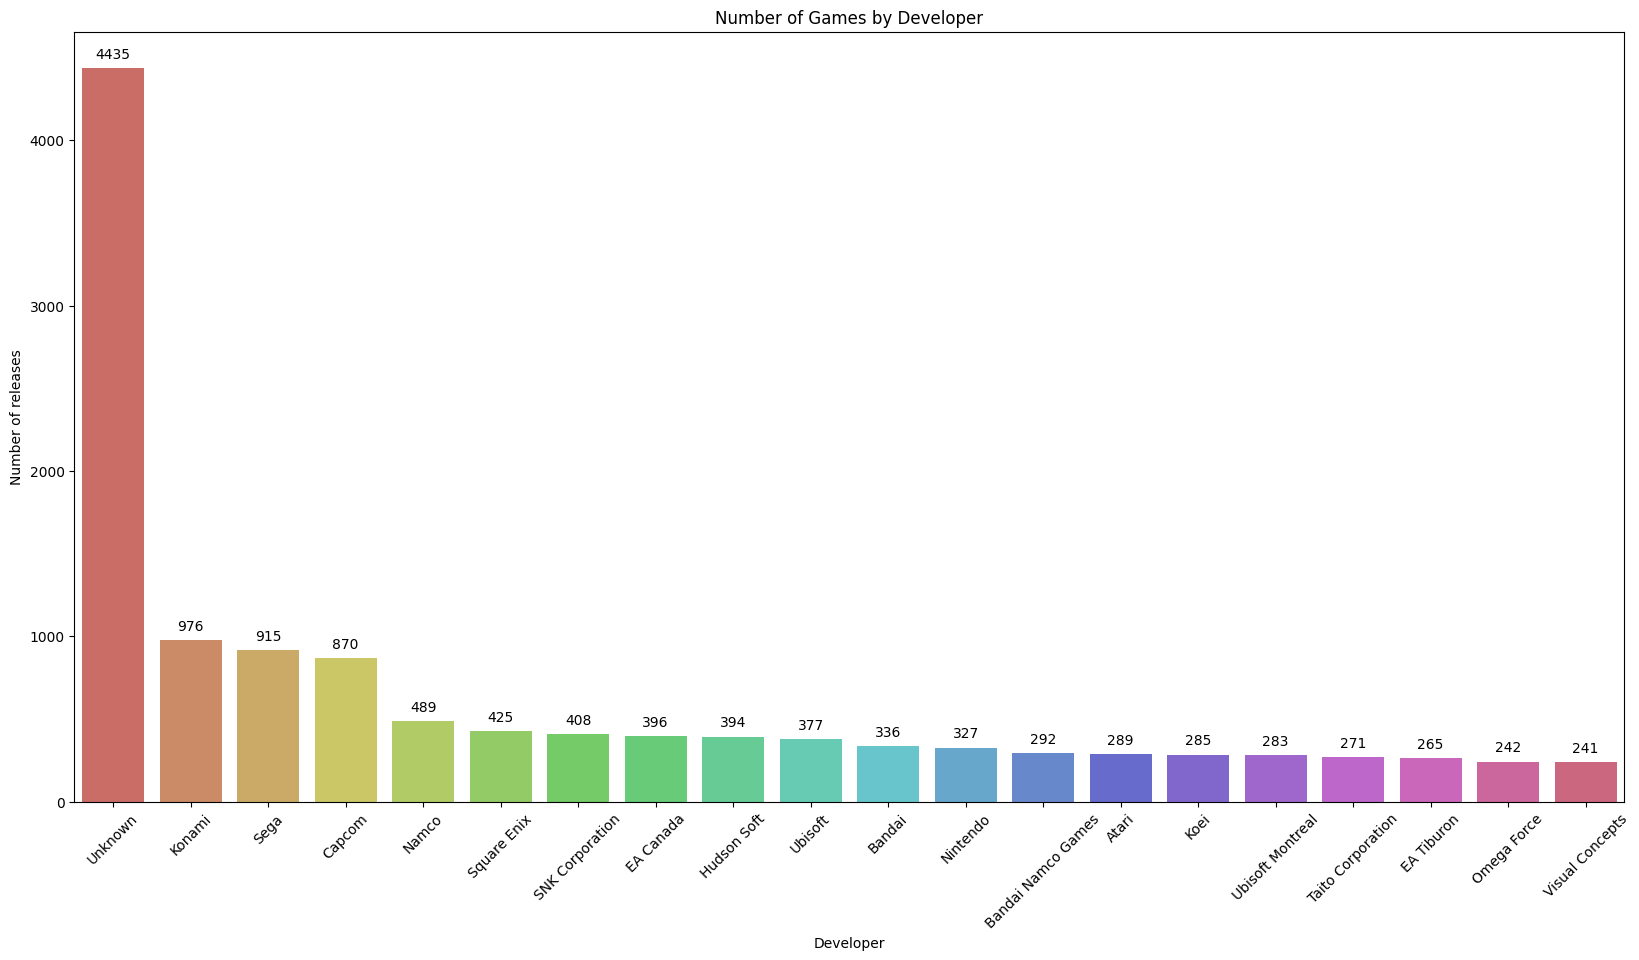

In [ ]:
# Chart
plt.figure(figsize=(20, 10))
count_plot = sns.barplot(
    x='Developer',
    y='Nb of games releases',
    data=developer_count_df,
    palette='hls'
)

for p in count_plot.patches:
    count_plot.annotate(
        f"{int(p.get_height())}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 10),
        textcoords='offset points'
    )

plt.title('Number of Games by Developer')
plt.xlabel('Developer')
plt.xticks(rotation=45)
plt.ylabel('Number of releases')

plt.show()

### Total Sales by Developer

In [ ]:
# Group by Console and Total Sales
developer_sales = df_games.groupby('developer')['total_sales'].sum().sort_values(ascending=False).head(20)

In [ ]:
# Convert to a DF
developer_sales_df = developer_sales.reset_index()
developer_sales_df.columns = ['Developer', 'Total Sales']
developer_sales_df

,Developer,Total Sales
0,EA Canada,275.56
1,EA Tiburon,178.33
2,Ubisoft Montreal,172.96
3,Treyarch,150.19
4,Traveller's Tales,149.55
5,Infinity Ward,118.97
6,Rockstar North,116.91
7,Konami,109.54
8,Visual Concepts,97.61
9,Capcom,93.02


<ipython-input-57-3f7f3ac525cb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sales_plot = sns.barplot(


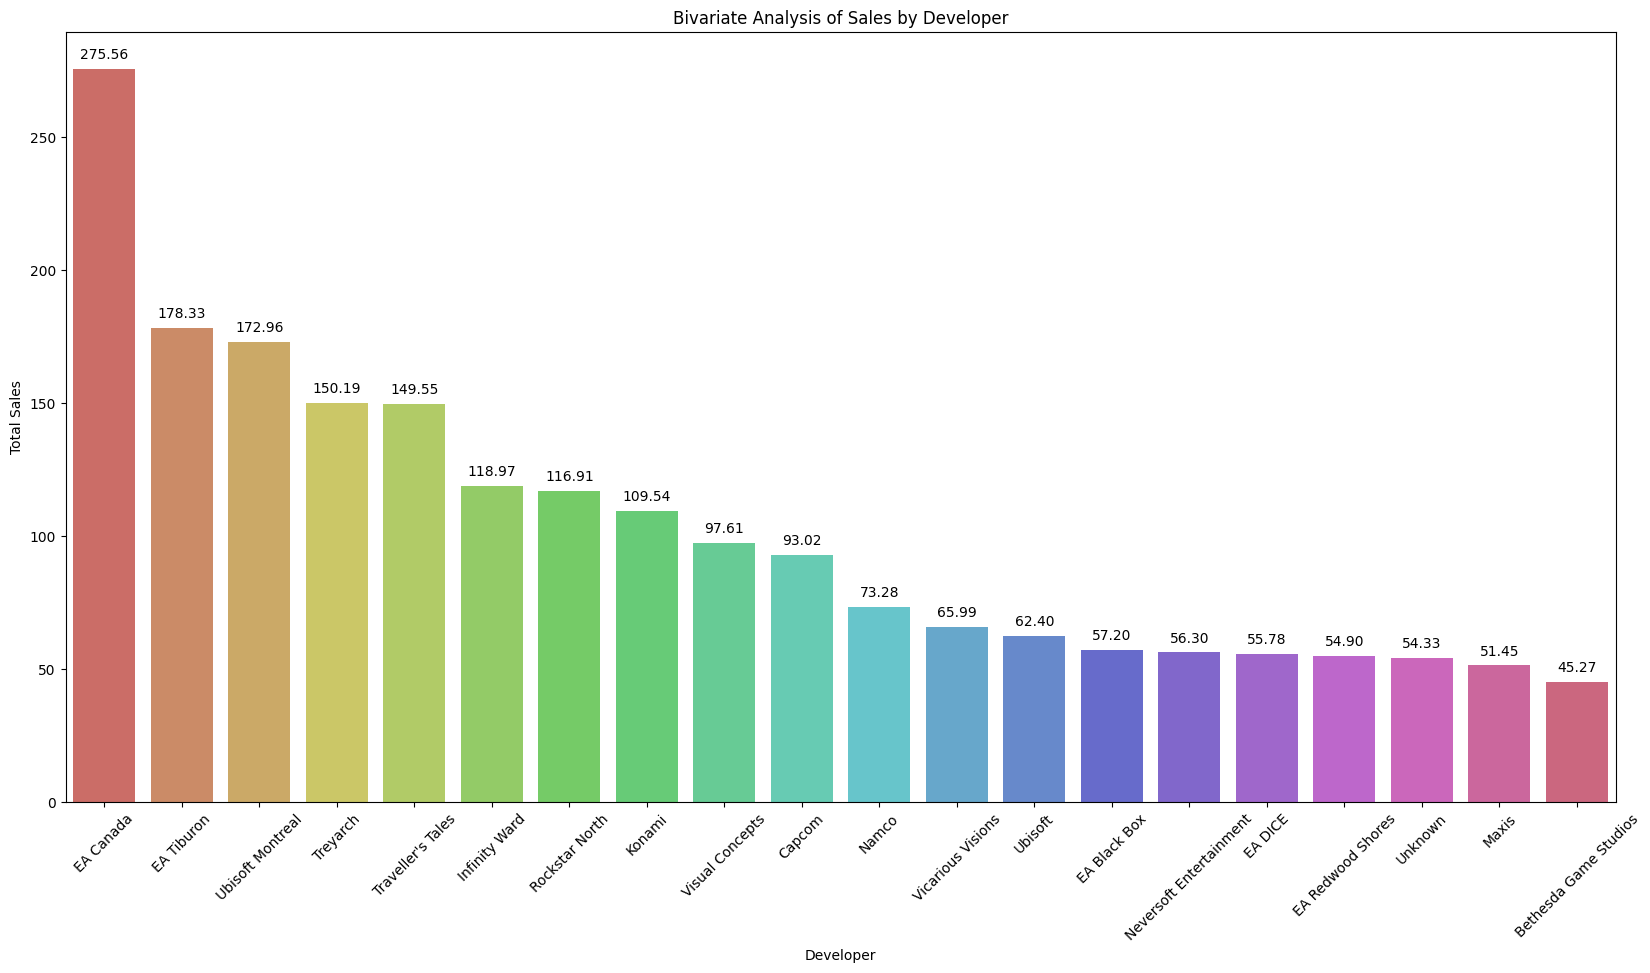

In [ ]:
# Chart
plt.figure(figsize=(20, 10))
sales_plot = sns.barplot(
    x='Developer',
    y='Total Sales',
    data=developer_sales_df,
    palette='hls'
)

for p in sales_plot.patches:
    sales_plot.annotate(
        f"{p.get_height():.2f}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 10),
        textcoords='offset points'
    )

plt.title('Bivariate Analysis of Sales by Developer')
plt.xlabel('Developer')
plt.xticks(rotation=45)
plt.ylabel('Total Sales')
plt.show()

### Critic score by Developer

In [ ]:
# Group by developer and average critic score
developer_score = df_games.groupby('developer')['critic_score'].mean().sort_values(ascending=False).head(20)

In [ ]:
# Convert to a DF
developer_score_df = developer_score.reset_index()
developer_score_df.columns = ['Developer', 'Critic score']
developer_score_df

,Developer,Critic score
0,Mojang AB,10.000
1,VGChartz,10.000
2,Starfire Studios,10.000
3,Rockstar Games,9.800
4,SIE Santa Monica Studio,9.700
5,2K Australia / 2K Boston,9.600
6,"Flagship Co., Ltd. / Nintendo EAD",9.600
7,Joakim Sandberg,9.500
8,Brace Yourself Games,9.500
9,Rockstar Leeds/North,9.500


<ipython-input-60-e955f7186b09>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  score_plot = sns.barplot(


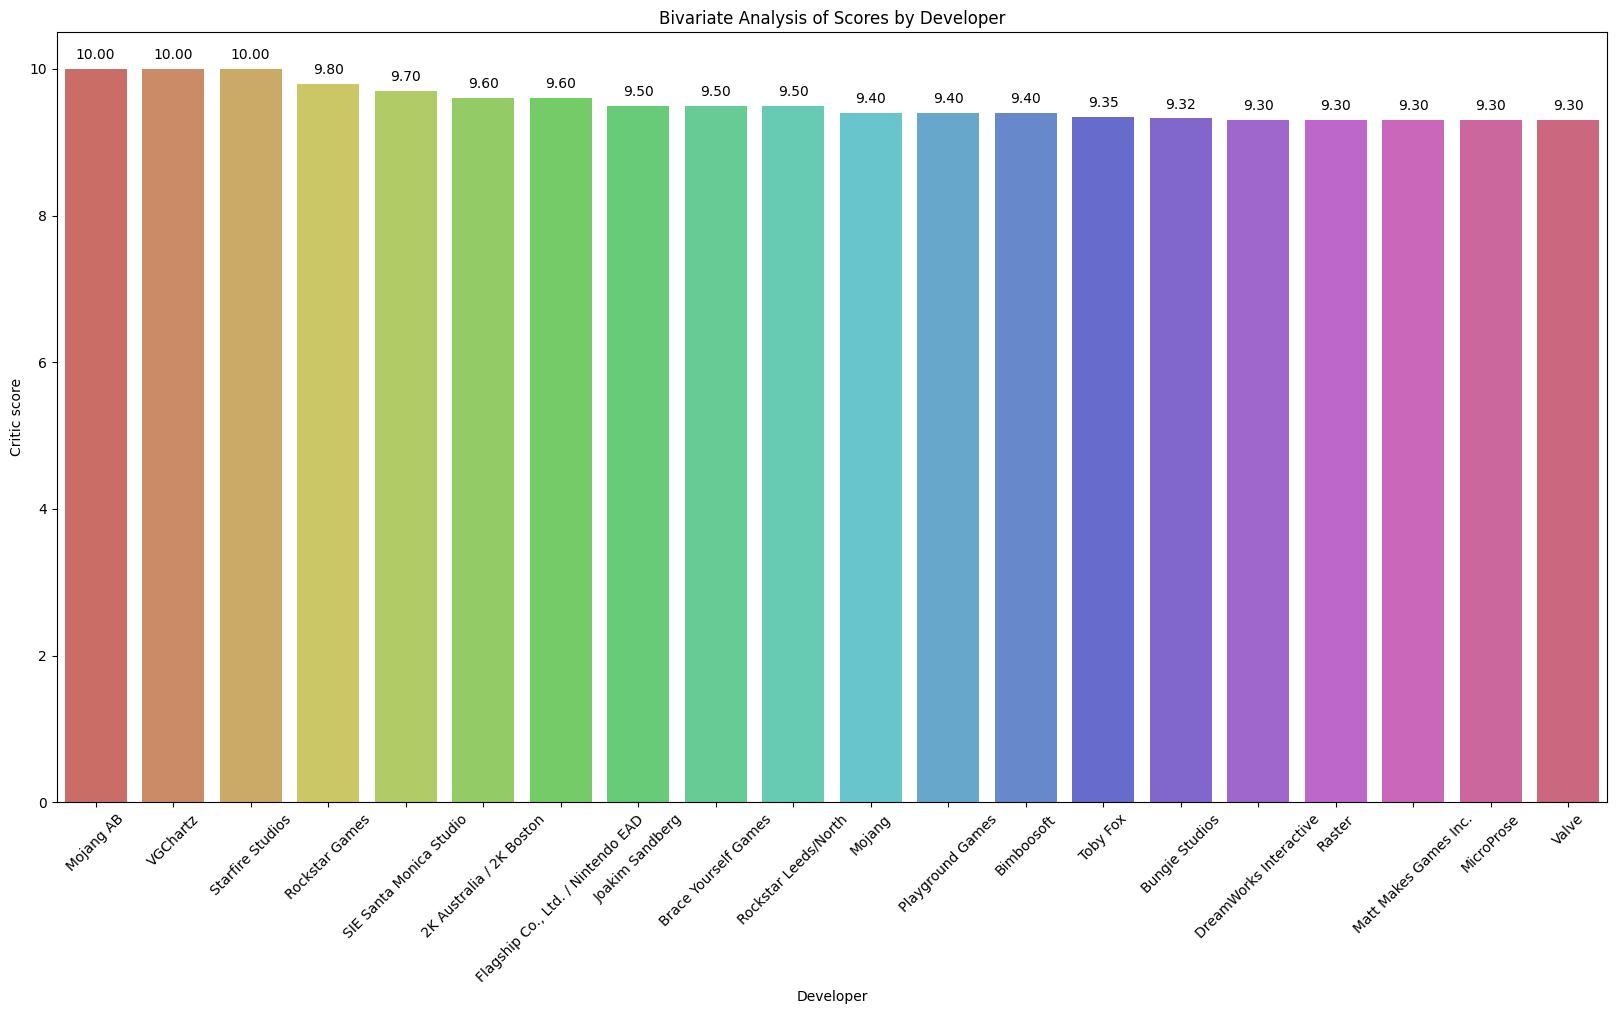

In [ ]:
# Chart
plt.figure(figsize=(20, 10))
score_plot = sns.barplot(
    x='Developer',
    y='Critic score',
    data=developer_score_df,
    palette='hls'
)

for p in score_plot.patches:
    score_plot.annotate(
        f"{p.get_height():.2f}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 10),
        textcoords='offset points'
    )

plt.title('Bivariate Analysis of Scores by Developer')
plt.xlabel('Developer')
plt.xticks(rotation=45)
plt.ylabel('Critic score')

plt.show()

## By Year

### Total Sales per Year

In [ ]:
global_sales_year = df_games.groupby('release_year')['total_sales'].sum().reset_index()
global_sales_year

,release_year,total_sales
0,1971,0.00
1,1973,0.00
2,1975,0.00
3,1977,2.50
4,1978,2.36
5,1979,0.31
6,1980,2.26
7,1981,7.73
8,1982,28.99
9,1983,22.68


From 2021 to 2024, there are 0 sales? That's weird!

<ipython-input-62-8a1947c2ba6b>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sales_plot = sns.lineplot(


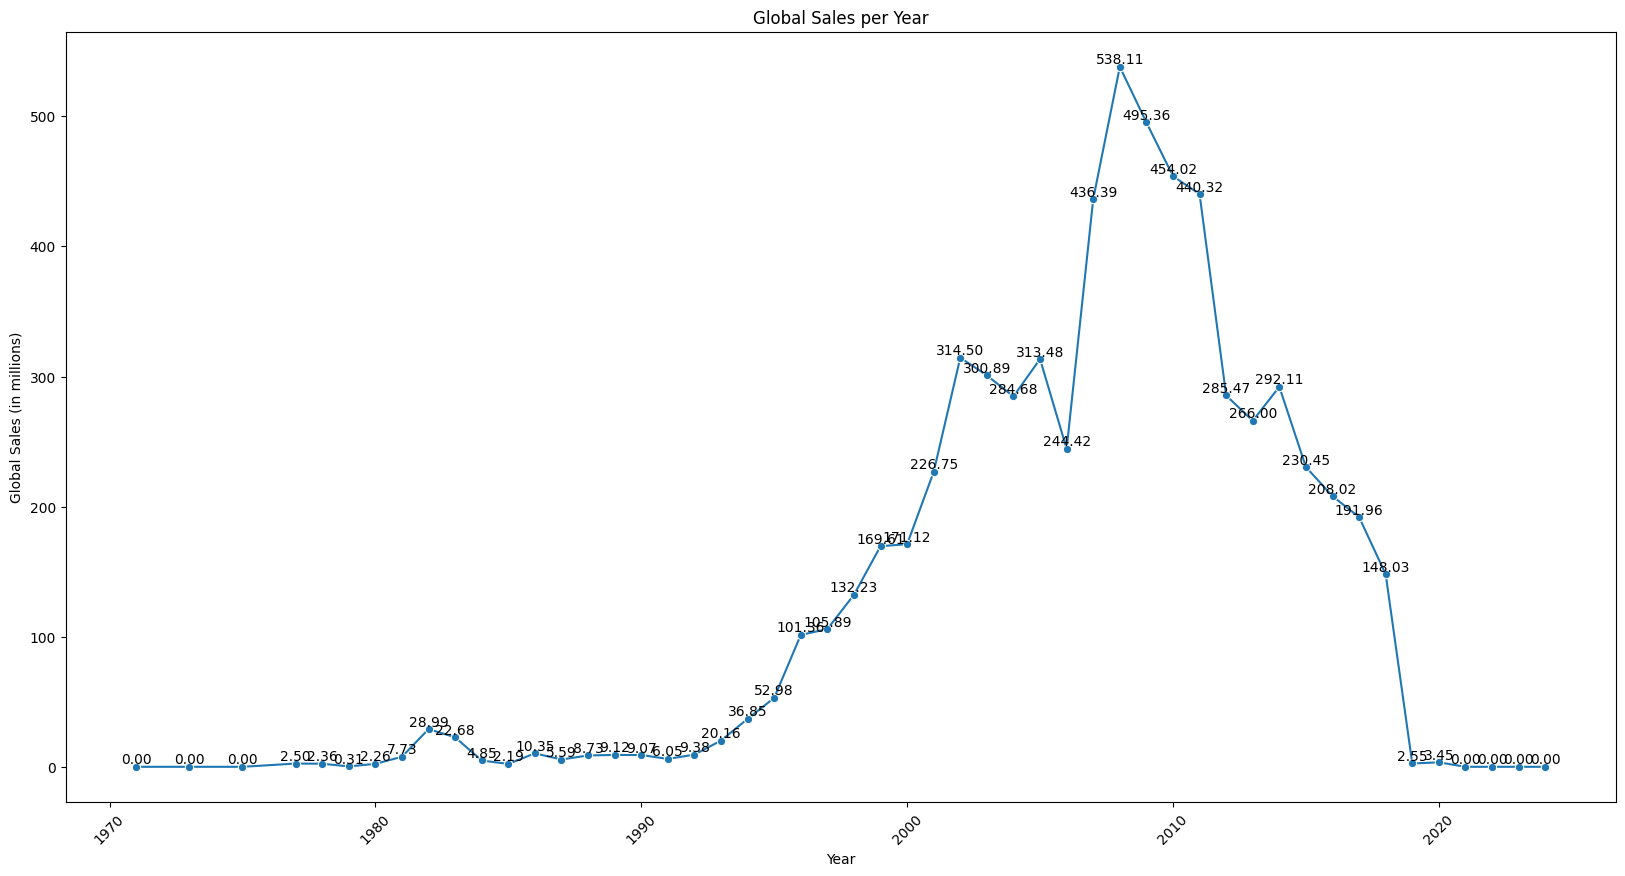

In [ ]:
# Chart
plt.figure(figsize=(20, 10))
sales_plot = sns.lineplot(
    x='release_year',
    y='total_sales',
    data=global_sales_year,
    marker='o',
    palette='hls'
)

for index, row in global_sales_year.iterrows():
    sales_plot.text(
        row['release_year'],
        row['total_sales'],
        f"{row['total_sales']:.2f}",
        color='black',
        ha="center",
        va="bottom"
    )

plt.title('Global Sales per Year')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')

plt.xticks(rotation=45)
plt.show()

### Years with The most releases and Number of releases

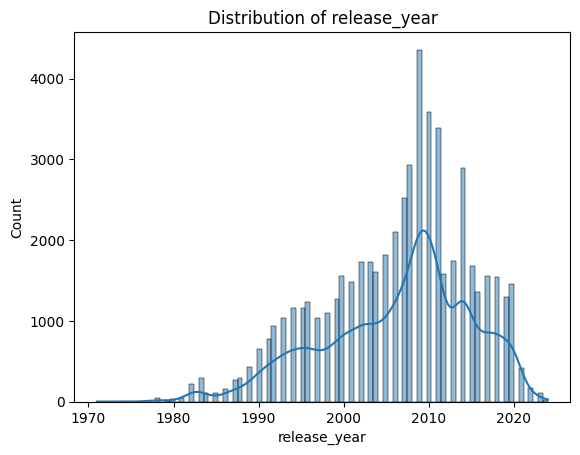

In [ ]:
# Univariate Analysis release_year
sns.histplot(df_games['release_year'], kde=True)
plt.title('Distribution of release_year')
plt.show()

In [ ]:
# Number of releases per year
release_year_counts = df_games['release_year'].value_counts().sort_index()

In [ ]:
# release_year_counts = release_year_counts.sort_values(ascending=False)

2009 and 2010 are the years with the most releases.

In [ ]:
 # % of total releases by year
total_releases = release_year_counts.sum()
release_year_percentages = (release_year_counts / total_releases) * 100

In [ ]:
# Convert to a DF
release_year_counts_df = release_year_counts.reset_index()
release_year_counts_df.columns = ['Year', 'Number of Releases']
release_year_counts_df['% of Total'] = release_year_percentages.values.round(2)

In [ ]:
# Sort by release_year (descending)
release_year_counts_df_desc = release_year_counts_df.sort_values(by='Number of Releases', ascending=False)
release_year_counts_df_desc.head(5)

,Year,Number of Releases,% of Total
35,2009,4360,7.65
36,2010,3586,6.3
37,2011,3386,5.94
34,2008,2936,5.15
40,2014,2896,5.08


<ipython-input-69-29435c02336d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


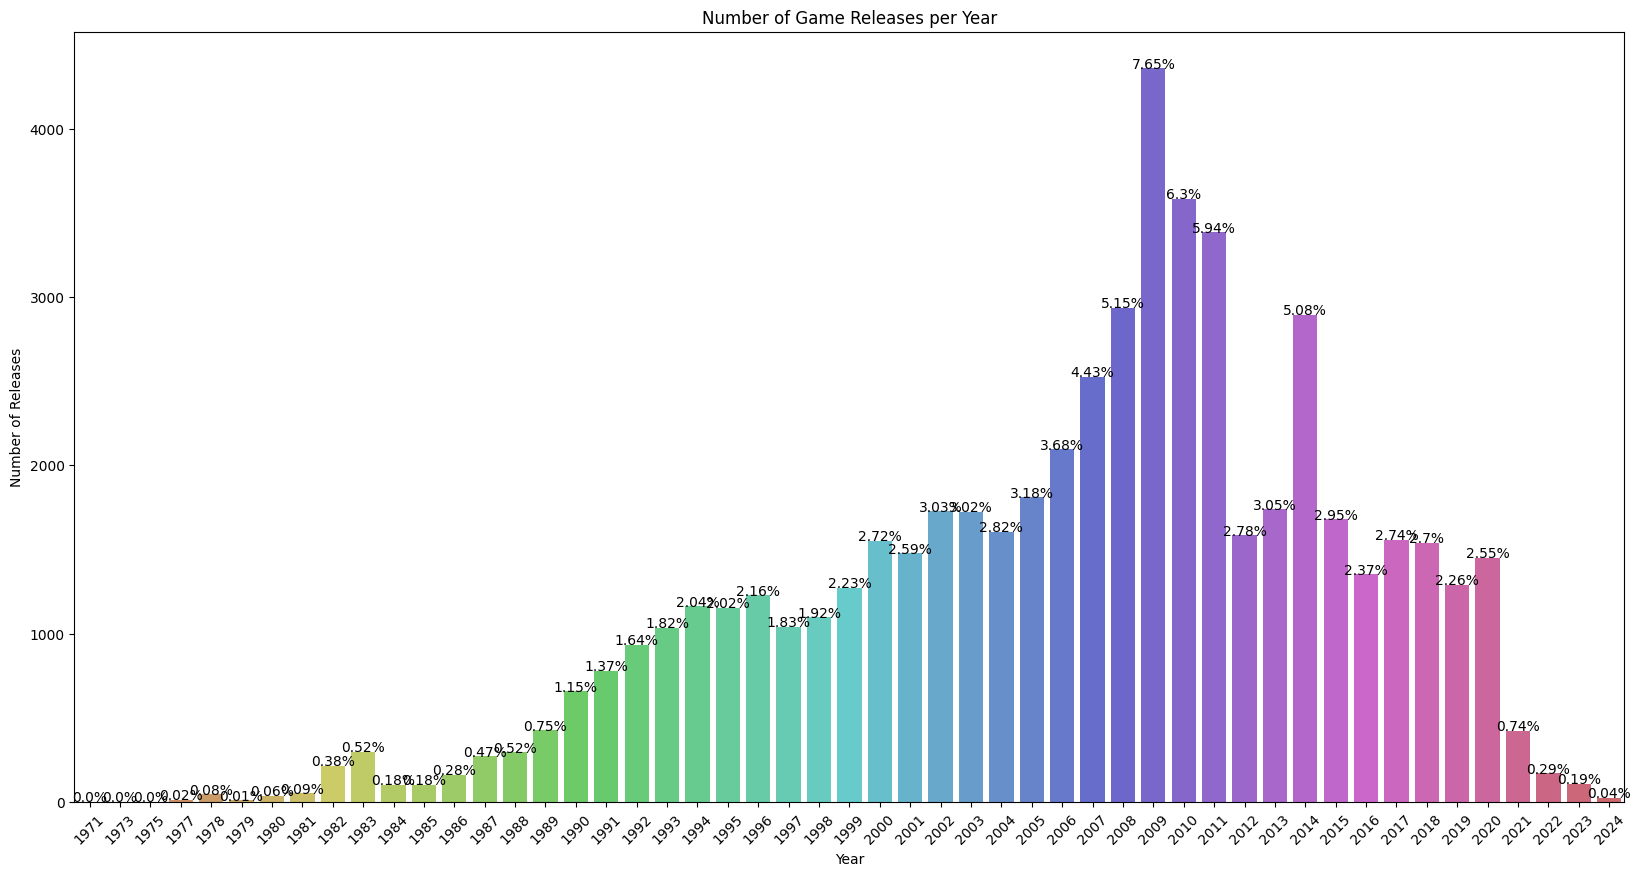

In [ ]:
# Chart
plt.figure(figsize=(20, 10))
barplot = sns.barplot(
    x='Year',
    y='Number of Releases',
    data=release_year_counts_df,
    palette="hls",
)

# %
for index, row in release_year_counts_df.iterrows():
    barplot.text(
        row.name,
        row['Number of Releases'] + 1,
        f"{row['% of Total']}%",
        color='black',
        ha="center"
    )

plt.title('Number of Game Releases per Year')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.xticks(rotation=45)
plt.show()

## By Month

In [ ]:
# Group by month and sales
monthly_sales = df_games.groupby('release_month')['total_sales'].sum().reset_index()

In [ ]:
total_sales_month = df_games.groupby('release_month')['total_sales'].sum().reset_index()
total_sales_month

,release_month,total_sales
0,1,293.66
1,2,327.67
2,3,479.64
3,4,240.75
4,5,324.78
5,6,421.58
6,7,195.15
7,8,404.96
8,9,848.88
9,10,1325.77


In [ ]:
month_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

total_sales_month['release_month_name'] = total_sales_month['release_month'].map(month_mapping)
total_sales_month = total_sales_month.sort_values('total_sales', ascending = False)
total_sales_month.head()

,release_month,total_sales,release_month_name
10,11,1490.30,November
9,10,1325.77,October
8,9,848.88,September
2,3,479.64,March
5,6,421.58,June


In [ ]:
total_sales_month.dropna(subset=['total_sales', 'release_month_name'], inplace=True)

In [ ]:
# Order the month in alphabetical order
total_sales_month['release_month_name'] = pd.Categorical(
    total_sales_month['release_month_name'],
    categories=[
        'January', 'February', 'March', 'April', 'May', 'June',
        'July', 'August', 'September', 'October', 'November', 'December'
    ],
    ordered=True
)

<ipython-input-75-364a20f1ef52>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sales_plot = sns.lineplot(


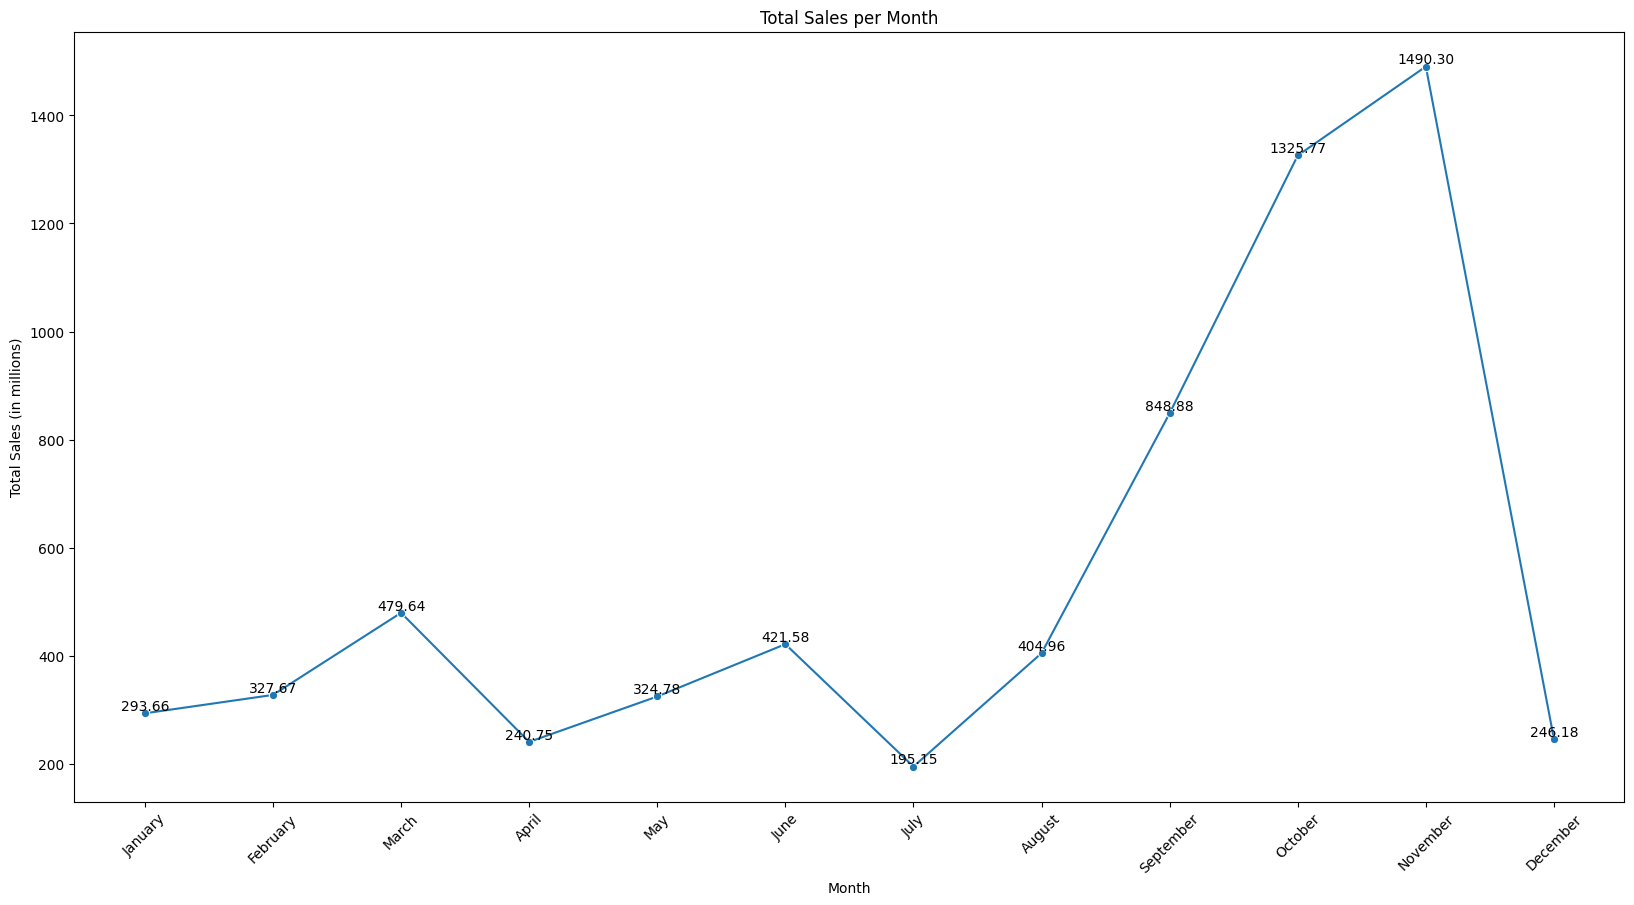

In [ ]:
# Chart
plt.figure(figsize=(20, 10))
sales_plot = sns.lineplot(
    x='release_month_name',
    y='total_sales',
    data=total_sales_month,
    marker='o',
    palette='hls'
)

# Ajouter des étiquettes pour chaque point
for index, row in total_sales_month.iterrows():
    sales_plot.text(
        row['release_month_name'],
        row['total_sales'],
        f"{row['total_sales']:.2f}",
        color='black',
        ha="center",
        va="bottom"
    )

plt.title('Total Sales per Month')
plt.xlabel('Month')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45)
plt.show()

### Correlation Matrix

In [ ]:
df_corr_games = df_games[[ 'critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']]

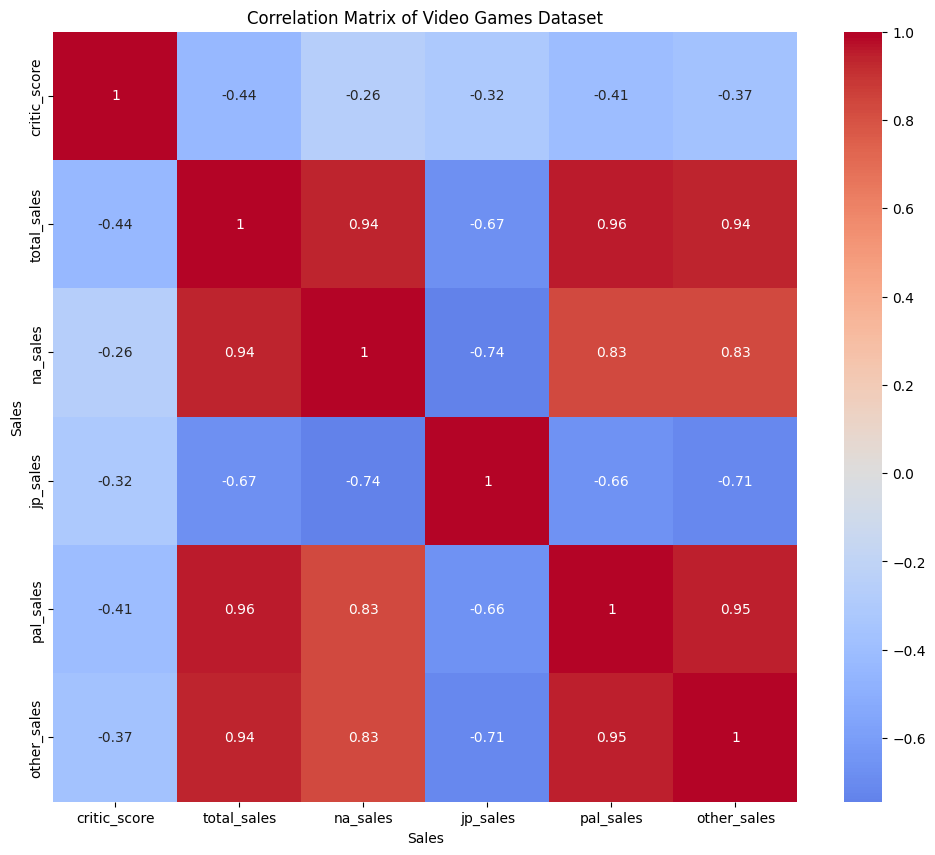

In [ ]:
df_corr_games = df_corr_games.corr()

correlation_matrix_games = df_corr_games.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_games, annot=True, cmap='coolwarm', center=0)

plt.title('Correlation Matrix of Video Games Dataset')
plt.xlabel("Sales")
plt.ylabel("Sales")
plt.show()

In [ ]:
# Extract month in column 'release_date'
df_games['release_month'] = df_games['release_date'].dt.to_period('M')